# Анализ факторов успешности видеоигр

Данное исследование посвящену изучению исторических данных по продажам видеоигр в разрезе регионов и различных платформ. 

<b>Цель исследования</b> - выявления факторов, определяющих потенциальный коммерческий хит.

<b>Данные</b> - продажи видеоигр с 1980 по 2016 гг. 

<b>Задачи:</b><br>
- Выявить актуальный временной период для анализа
- Изучить особенности отдельных платформ и рынков
- Составить топ наиболее популярных и хорошо продающихся жанров
- Изучить потенциальное влияние на итоговые продажи оценок пользователей и критиков, возрастных рейтингов ESRB

<b>Ключевые выводы исследования:</b><br>
- Японский рынок уникален, ориентирован на портативные платформы и JRPG с подростковым возрастным рейтингом.
- На остальных рынках возрастные рейтинги не оказывают серьезного влияния.
- Оценки критиков и пользователей могут быть в какой-то мере быть связаны с ростом продаж только у самых качественных проектов. 
- Ключевыми определяющими факторами продаж следует считать популярную платформу (ПС4, в меньшей мере Xbox One) и жанр (Экшен, Шутер, в меньшей степени Спортивные игры). 


План исследования представлен ниже в разделе "Оглавление".

<a id="title"></a>

<b>Оглавление:</b>
1. [Открытие и первичный анализ данных](#start)
1. [Подготовка данных](#A/B)
    * [Замена типов данных](#types)
    * [Обработка ошибок](#mistakes)
    * [Промежуточный вывод](#first_conclusion)
    
3. [Исследовательский анализ данных](#second_step)
    * [Общее описание данных](#second_step)
    * [Анализ продаж за актуальный период](#learning)
    * [Влияние оценок пользователей и критиков](#ratings) 
    * [Распределение релизов и продаж по жанрам](#genre_distr)
    * [Промежуточный вывод](#second_conclusion)
4. [Портреты пользователей по регионам](#third_step)
    * [Топ платформ](#third_step)
    * [Топ жанров](#hierarchy)
    * [Влияние оценок рейтинговых агентств на продажи](#k-means)
    * [Промежуточный вывод](#third_conclusion)
5. [Проверка гипотез о равенстве пользовательских оценок](#fourth_step)
    * [Xbox и PC](#xbox)
    * [Экшены и спортивные игры](#action)
    * [Промежуточный вывод](#fourth_conclusion)

6. [Итоговый вывод](#final_conclusion)

<a id="start"></a>

## Открытие и первичный анализ данных 

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import datetime as dt

In [2]:
sns.set(rc={'figure.figsize':(12,9)})

In [3]:
pd.set_option('display.precision', 3)
pd.options.display.max_colwidth = 1

Подгружаем библиотеки и выставляем параметры отображения

In [4]:
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [5]:
display(games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Подгружаем массивы

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, массив содержит данные о почти 17 тысячах клиентов. Предварительный анализ показывает следующие проблемы:
- Заголовки с заглавными буквами
- Наличие небольшого количества пропусков в переменных "Название", "Год выпуска" и "Жанр".
- Очень большое число пропусков в переменных "Оценки критиков", "Оценки пользователей" и "Рейтинг", первый вызгляд на данные позволяет нам предположить, что это зачастую малоизвестные игры, которые могли выходить на каком-то одном рынке, например, Японском, где очевидно нет ESRB.
- Неоптимальные типы данных.

[Вернуться к оглавлению](#title)

<a id="A/B"></a>

## Подготовка данных

В данном разделе мы подкорректируем заголовки, изменим типы данных и проведем поиск дубликатов, пропущенных значений и других возможных ошибок, а также рассчитаем дополнительные столбцы, необходимые в анализе.

[Вернуться к оглавлению](#title)

In [7]:
games.columns = map(str.lower, games.columns)

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для начала приведем названия столбцов к корректному виду

<a id="types"></a>

### Замена типов данных 

In [9]:
def des_var(data):
    for i in list(data):
        if (data[i].dtypes!='object') and (data[i].nunique() > 20):
             display (data[i].describe())
        else: 
            display (data[i].value_counts())
        print ('------------------------------')
        print (' ')

In [10]:
des_var(games)

Need for Speed: Most Wanted                         12
Ratatouille                                         9 
LEGO Marvel Super Heroes                            9 
FIFA 14                                             9 
Madden NFL 07                                       9 
                                                   .. 
Jewels of the Tropical Lost Island                  1 
Sherlock Holmes and the Mystery of Osborne House    1 
The King of Fighters '95 (CD)                       1 
Megamind: Mega Team Unite                           1 
Haitaka no Psychedelica                             1 
Name: name, Length: 11559, dtype: int64

------------------------------
 


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC      974 
XB      824 
GBA     822 
GC      556 
3DS     520 
PSV     430 
PS4     392 
N64     319 
XOne    247 
SNES    239 
SAT     173 
WiiU    147 
2600    133 
NES     98  
GB      98  
DC      52  
GEN     29  
NG      12  
SCD     6   
WS      6   
3DO     3   
TG16    2   
GG      1   
PCFX    1   
Name: platform, dtype: int64

------------------------------
 


count    16446.000
mean     2006.485 
std      5.877    
min      1980.000 
25%      2003.000 
50%      2007.000 
75%      2010.000 
max      2016.000 
Name: year_of_release, dtype: float64

------------------------------
 


Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform        888 
Simulation      873 
Fighting        849 
Strategy        683 
Puzzle          580 
Name: genre, dtype: int64

------------------------------
 


count    16715.000
mean     0.263    
std      0.814    
min      0.000    
25%      0.000    
50%      0.080    
75%      0.240    
max      41.360   
Name: na_sales, dtype: float64

------------------------------
 


count    16715.000
mean     0.145    
std      0.503    
min      0.000    
25%      0.000    
50%      0.020    
75%      0.110    
max      28.960   
Name: eu_sales, dtype: float64

------------------------------
 


count    16715.000
mean     0.078    
std      0.309    
min      0.000    
25%      0.000    
50%      0.000    
75%      0.040    
max      10.220   
Name: jp_sales, dtype: float64

------------------------------
 


count    16715.000
mean     0.047    
std      0.187    
min      0.000    
25%      0.000    
50%      0.010    
75%      0.030    
max      10.570   
Name: other_sales, dtype: float64

------------------------------
 


count    8137.000
mean     68.968  
std      13.938  
min      13.000  
25%      60.000  
50%      71.000  
75%      79.000  
max      98.000  
Name: critic_score, dtype: float64

------------------------------
 


tbd    2424
7.8    324 
8      290 
8.2    282 
8.3    254 
      ...  
1.1    2   
1.9    2   
9.6    2   
0      1   
9.7    1   
Name: user_score, Length: 96, dtype: int64

------------------------------
 


E       3990
T       2961
M       1563
E10+    1420
EC      8   
K-A     3   
RP      3   
AO      1   
Name: rating, dtype: int64

------------------------------
 


Удалим пропуски в переменной "Год выхода" и переведем ее в интежер.

In [11]:
games['year_of_release'].isna().sum()

269

Пропусков в этой переменной очень мало, строки без них для нас бесполезны, так как в определенный момент нам надо будет отделить актуальные данные от исторических, поэтому их можно смело удалять.

In [12]:
games = games[games['year_of_release'] == games['year_of_release']]

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [14]:
games['year_of_release'] = games['year_of_release'].astype('int')

Типы данных в основном заменены, но отдельно необходимо принять решение относитель "Пользовательской оценки", в которой попадаются значения tbd, что принято расшифровывать как to be decided, то есть оценки пока нет.

In [15]:
games[games['user_score'] == 'tbd'].pivot_table(index = 'user_score', columns = 'year_of_release', values = 'name', aggfunc = 'count')

year_of_release,1997,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
user_score,,,,,,,,,,,,,,,,,,,
tbd,1,8,43,82,192,95,107,121,124,192,326,405,331,217,24,15,21,38,34


Изначальное предположение о том, что ТБД - это еще не выставленные оценки не подтвердилось, такая пометка встречается, начиная с 1997 года. Так как строк с ней слишком много - более 10% от общего объема данных, просто удалить их не получится. 

In [16]:
des_var(games[games['user_score'] == 'tbd'])

Wipeout 2                                                 5
DreamWorks Super Star Kartz                               5
Cars: Race-O-Rama                                         5
Ben 10 Galactic Racing                                    5
Bakugan Battle Brawlers: Defenders of the Core            5
                                                         ..
Championship Motocross 2001 featuring Ricky Carmichael    1
Heroes of Mana                                            1
Adrenalin Misfits                                         1
SafeCracker: The Ultimate Puzzle Adventure                1
Men in Black II: Alien Escape                             1
Name: name, Length: 1903, dtype: int64

------------------------------
 


DS      744
Wii     428
GBA     258
PS2     236
XB      146
PSP     118
GC      100
PS3     87 
X360    83 
3DS     54 
PC      49 
PS      44 
XOne    11 
PSV     7  
PS4     6  
WiiU    5  
Name: platform, dtype: int64

------------------------------
 


2009    405
2010    331
2008    326
2011    217
2002    192
2007    192
2006    124
2005    121
2004    107
2003    95 
2001    82 
2000    43 
2015    38 
2016    34 
2012    24 
2014    21 
2013    15 
1999    8  
1997    1  
Name: year_of_release, dtype: int64

------------------------------
 


Misc            440
Sports          406
Action          368
Simulation      233
Racing          229
Puzzle          208
Adventure       156
Platform        135
Shooter         95 
Strategy        39 
Fighting        37 
Role-Playing    30 
Name: genre, dtype: int64

------------------------------
 


count    2376.000
mean     0.126   
std      0.177   
min      0.000   
25%      0.030   
50%      0.070   
75%      0.150   
max      3.450   
Name: na_sales, dtype: float64

------------------------------
 


count    2376.000
mean     0.044   
std      0.112   
min      0.000   
25%      0.000   
50%      0.010   
75%      0.040   
max      2.590   
Name: eu_sales, dtype: float64

------------------------------
 


count    2376.000
mean     0.003   
std      0.026   
min      0.000   
25%      0.000   
50%      0.000   
75%      0.000   
max      0.860   
Name: jp_sales, dtype: float64

------------------------------
 


count    2376.000
mean     0.016   
std      0.039   
min      0.000   
25%      0.000   
50%      0.010   
75%      0.020   
max      1.090   
Name: other_sales, dtype: float64

------------------------------
 


count    1056.000
mean     60.766  
std      11.191  
min      23.000  
25%      54.000  
50%      62.000  
75%      69.000  
max      90.000  
Name: critic_score, dtype: float64

------------------------------
 


tbd    2376
Name: user_score, dtype: int64

------------------------------
 


E       1548
T       369 
E10+    360 
M       42  
EC      7   
Name: rating, dtype: int64

------------------------------
 


In [17]:
games[(games['user_score'] == 'tbd') & (games['year_of_release'] >= 2013)].count()/(games[(games['user_score'] == 'tbd') & (games['year_of_release'] < 2013)].count() + games[(games['user_score'] == 'tbd') & (games['year_of_release'] >= 2013)].count())

name               0.045
platform           0.045
year_of_release    0.045
genre              0.045
na_sales           0.045
eu_sales           0.045
jp_sales           0.045
other_sales        0.045
critic_score       0.011
user_score         0.045
rating             0.041
dtype: float64

Итак, мы видим, что tbd в основном относится к играм, вышедшим за пределами актуального периода, началом которого мы предварительно будем считать 2013, год выхода актуального на момент анализа поколения консолей. Всего 4% этих пометок было выставлено, начиная с 2013. Так как он мешает нам в вопросе перевода в корректный тип данных, мы заменим его заглушкой.

In [18]:
games['user_score'][games['user_score'] == 'tbd'] = -1

C:\Users\CaIII\AppData\Local\Temp\ipykernel_23768\2333640811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['user_score'][games['user_score'] == 'tbd'] = -1


In [19]:
games['user_score'] = games['user_score'].astype('float')

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Итак, мы привели тип данных у всех используемых переменных к оптимальному. 

[Вернуться к оглавлению](#title)

<a id="mistakes"></a>

### Обработка ошибок

Для начала изучим массив на факт наличия пропущенных значений

In [21]:
def miss_table(data):
    missings = pd.DataFrame(data.isna().mean()*100, columns = ['% miss'])
    missings['# miss'] = pd.DataFrame(data.isna().sum())
    display (missings.style.background_gradient('coolwarm'))

In [22]:
miss_table(games)

,% miss,# miss
name,0.012161,2
platform,0.000000,0
year_of_release,0.000000,0
genre,0.012161,2
na_sales,0.000000,0
eu_sales,0.000000,0
jp_sales,0.000000,0
other_sales,0.000000,0
critic_score,51.459321,8463
user_score,40.173902,6607


Как уже упоминалось, есть незначительные пропуски в переменных "Название" и "Жанр", которые можно удалить. 

In [23]:
games = games[games['name'] == games['name']]

Так как пропуски были в одних и тех же строках, они исчезли. 

Далее необходимо изучить пропуски в других переменных на предмет их возможного заполнения в сооответствии с группировкой по одной из категориальных перемен 

In [24]:
for i in list(games['genre'].unique()):
    print (i)
    print (games[games['genre'] == i][['critic_score', 'user_score', 'rating']].median())
    print ('---------')

Sports
critic_score    75.0
user_score      6.5 
dtype: float64
---------
Platform
critic_score    69.5
user_score      7.1 
dtype: float64
---------
Racing
critic_score    69.0
user_score      6.6 
dtype: float64
---------
Role-Playing
critic_score    74.0
user_score      7.8 
dtype: float64
---------
Puzzle
critic_score    70.0
user_score     -1.0 
dtype: float64
---------
Misc
critic_score    69.0
user_score     -1.0 
dtype: float64
---------
Shooter
critic_score    73.0
user_score      7.3 
dtype: float64
---------
Simulation
critic_score    70.00
user_score      5.45 
dtype: float64
---------
Action
critic_score    68.0
user_score      7.0 
dtype: float64
---------
Fighting
critic_score    72.0
user_score      7.5 
dtype: float64
---------
Adventure
critic_score    66.0
user_score      6.3 
dtype: float64
---------
Strategy
critic_score    73.0
user_score      7.6 
dtype: float64
---------


C:\Users\CaIII\AppData\Local\Temp\ipykernel_23768\293387044.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print (games[games['genre'] == i][['critic_score', 'user_score', 'rating']].median())
C:\Users\CaIII\AppData\Local\Temp\ipykernel_23768\293387044.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print (games[games['genre'] == i][['critic_score', 'user_score', 'rating']].median())
C:\Users\CaIII\AppData\Local\Temp\ipykernel_23768\293387044.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling

In [25]:
for i in list(games['platform'].unique()):
    print (i)
    print (games[games['platform'] == i][['critic_score', 'user_score', 'rating']].mean())
    print ('---------')

Wii
critic_score    62.778
user_score      3.345 
dtype: float64
---------
NES
critic_score   NaN
user_score     NaN
rating         NaN
dtype: float64
---------
GB
critic_score   NaN
user_score     NaN
rating         NaN
dtype: float64
---------
DS
critic_score    63.729
user_score      2.270 
dtype: float64
---------
X360
critic_score    68.686
user_score      6.061 
dtype: float64
---------
PS3
critic_score    70.469
user_score      6.011 
dtype: float64
---------
PS2
critic_score    68.715
user_score      6.227 
dtype: float64
---------
SNES
critic_score   NaN
user_score     NaN
rating         NaN
dtype: float64
---------
GBA
critic_score    67.312
user_score      3.275 
dtype: float64
---------
PS4
critic_score    72.091
user_score      6.571 
dtype: float64
---------
3DS
critic_score    67.157
user_score      4.968 
dtype: float64
---------
N64
critic_score   NaN
user_score     NaN
rating         NaN
dtype: float64
---------
PS
critic_score    71.587
user_score      5.938 
dtype: 

C:\Users\CaIII\AppData\Local\Temp\ipykernel_23768\3113284331.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print (games[games['platform'] == i][['critic_score', 'user_score', 'rating']].mean())
C:\Users\CaIII\AppData\Local\Temp\ipykernel_23768\3113284331.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print (games[games['platform'] == i][['critic_score', 'user_score', 'rating']].mean())
C:\Users\CaIII\AppData\Local\Temp\ipykernel_23768\3113284331.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before ca

critic_score    67.535
user_score      5.424 
dtype: float64
---------
XOne
critic_score    73.325
user_score      6.093 
dtype: float64
---------
WiiU
critic_score    70.733
user_score      6.528 
dtype: float64
---------
GC
critic_score    69.602
user_score      5.730 
dtype: float64
---------
GEN
critic_score   NaN
user_score     NaN
rating         NaN
dtype: float64
---------
DC
critic_score    87.357
user_score      8.529 
dtype: float64
---------
PSV
critic_score    70.731
user_score      6.943 
dtype: float64
---------
SAT
critic_score   NaN
user_score     NaN
rating         NaN
dtype: float64
---------
SCD
critic_score   NaN
user_score     NaN
rating         NaN
dtype: float64
---------
WS
critic_score   NaN
user_score     NaN
rating         NaN
dtype: float64
---------
NG
critic_score   NaN
user_score     NaN
rating         NaN
dtype: float64
---------
TG16
critic_score   NaN
user_score     NaN
rating         NaN
dtype: float64
---------
3DO
critic_score   NaN
user_score     N

C:\Users\CaIII\AppData\Local\Temp\ipykernel_23768\3113284331.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print (games[games['platform'] == i][['critic_score', 'user_score', 'rating']].mean())
C:\Users\CaIII\AppData\Local\Temp\ipykernel_23768\3113284331.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print (games[games['platform'] == i][['critic_score', 'user_score', 'rating']].mean())
C:\Users\CaIII\AppData\Local\Temp\ipykernel_23768\3113284331.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before ca

In [26]:
for i in list(games['year_of_release'].unique()):
    print (i)
    print (games[games['year_of_release'] == i][['critic_score', 'user_score']].mean())
    print ('---------')

2006
critic_score    67.339
user_score      5.734 
dtype: float64
---------
1985
critic_score    59.0
user_score      5.8 
dtype: float64
---------
2008
critic_score    65.905
user_score      4.325 
dtype: float64
---------
2009
critic_score    67.555
user_score      3.815 
dtype: float64
---------
1996
critic_score    89.875
user_score      8.400 
dtype: float64
---------
1989
critic_score   NaN
user_score     NaN
dtype: float64
---------
1984
critic_score   NaN
user_score     NaN
dtype: float64
---------
2005
critic_score    68.820
user_score      6.047 
dtype: float64
---------
1999
critic_score    75.769
user_score      6.536 
dtype: float64
---------
2007
critic_score    66.181
user_score      5.049 
dtype: float64
---------
2010
critic_score    67.482
user_score      3.609 
dtype: float64
---------
2013
critic_score    71.278
user_score      6.119 
dtype: float64
---------
2004
critic_score    69.394
user_score      6.180 
dtype: float64
---------
1990
critic_score   NaN
user_sco

Итак, мы видим, что, во-первых, разница в средних значениях оценок от пользователей и критиков между годами, платформами и жанрами есть, во-вторых, что зачастую пропуски обусловлены какой-то конкретной платформой (зачастую устаревшей) или годом, необходимо проверить насколько часты пропуски в актуальный временной период.

In [27]:
miss_table(games[games['year_of_release'] >=2013])

,% miss,# miss
name,0.000000,0
platform,0.000000,0
year_of_release,0.000000,0
genre,0.000000,0
na_sales,0.000000,0
eu_sales,0.000000,0
jp_sales,0.000000,0
other_sales,0.000000,0
critic_score,55.620242,1242
user_score,41.782356,933


Итак, пропуски есть и в актуальный период, причем в той же пропорции - около половины от массива.

Мы не будем их удалять в силу того, что рискуем потерять слишком большой объем информации, так как заменять их медианными или иными значениями нам также не с руки из-за потенциального влияния на чистоту результатов, мы просто заменим их заглушками. 

In [28]:
games['critic_score'].fillna(-1, inplace = True)

In [29]:
games['user_score'].fillna(-1, inplace = True)

In [30]:
games['rating'][games['rating'].isna()] = 'No rating'

In [31]:
miss_table(games)

,% miss,# miss
name,0.000000,0
platform,0.000000,0
year_of_release,0.000000,0
genre,0.000000,0
na_sales,0.000000,0
eu_sales,0.000000,0
jp_sales,0.000000,0
other_sales,0.000000,0
critic_score,0.000000,0
user_score,0.000000,0


Итак, пропуски удалены, переходим к дубликатам.

In [32]:
games.duplicated().sum()

0

Очевидные дубликаты отсутствуют, проверим неочевидные

In [33]:
print (games['name'].nunique())
print (games.shape)

11426
(16444, 11)


Видим, что названия игр повторяются.

In [34]:
games['name'].value_counts()

Need for Speed: Most Wanted               12
LEGO Marvel Super Heroes                  9 
Ratatouille                               9 
FIFA 14                                   9 
Terraria                                  8 
                                         .. 
Loving Life with Hello Kitty & Friends    1 
Scrabble (Others sales)                   1 
Viva Pinata: Party Animals                1 
Sands of Destruction                      1 
Haitaka no Psychedelica                   1 
Name: name, Length: 11426, dtype: int64

In [35]:
games[games['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,-1.0,-1.0,No rating
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,-1.0,-1.0,No rating
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,-1.0,-1.0,No rating
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Выяснилось, что повторения названий игр - это релизы на других платформах и переиздания, поэтому с ними мы бороться не будем. Также здесь мы видим, что даже у такой популярной игры как НФС нет оценок для изданий на некоторых платформах.

In [36]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Расчитаем столбец общих продаж

[Вернуться к оглавлению](#title)

<a id="first_conclusion"></a>

### Промежуточный вывод

<b>Итого:</b><br>
- Исторические данные по продажам оказались достаточно проблемными с большим количеством пропусков
- Пропуски в большинстве своем были из-за платформ, которые не оценивались, игр, малопопулярных игр и очень старых релизов
- Одной большой проблемой является, видимо, японский рынок, который крайне самобытен и многие выходящие там игры не проходят рейтингования ESRB и не получают оценок на популярных западных ресурсах или от индексируемых крупными платформами критиков.
- Пропуски были заполнены заглушками

[Вернуться к оглавлению](#title)

<a id="second_step"></a>

## Исследовательский анализ данных

### Общее описание данных

Text(0.5, 0, 'Год')

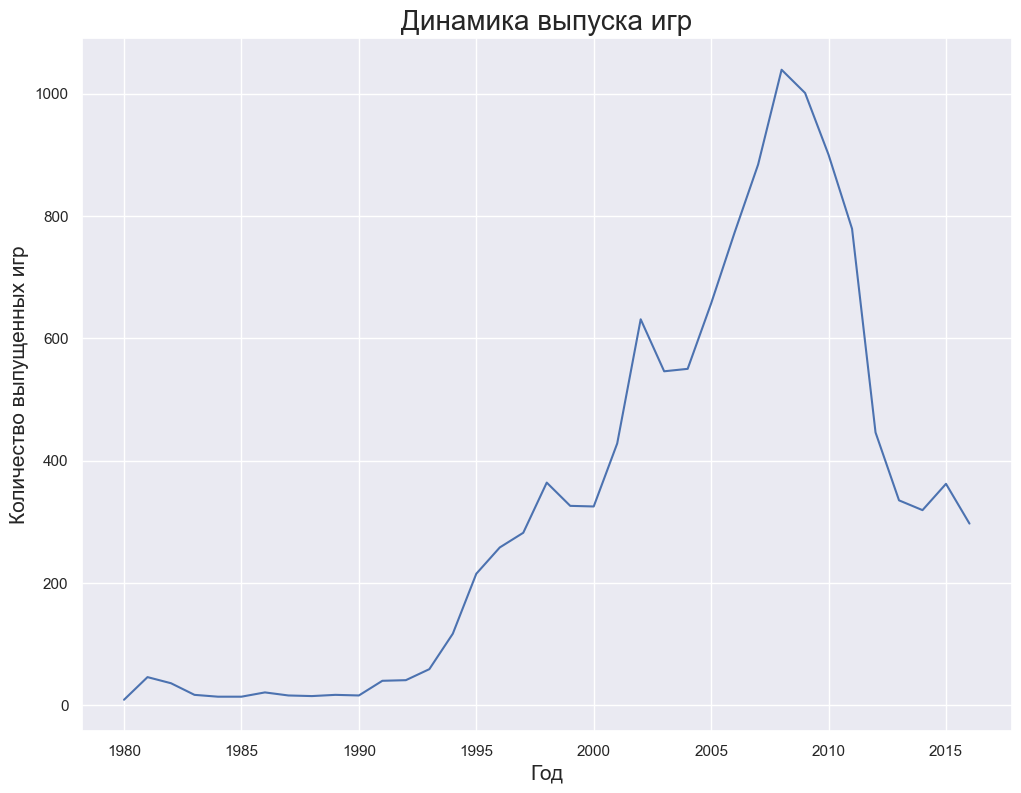

In [37]:
ax = sns.lineplot(data=games.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'nunique'), x='year_of_release', y='name')
ax.set_title('Динамика выпуска игр', fontsize=20)
ax.set_ylabel('Количество выпущенных игр', fontsize=15)
ax.set_xlabel('Год', fontsize=15)

Смотрим на количество уникальных наименований игр за год, дабы избежать учета релизов на разных платформах, и видим, что пик количества релизов пришелся на середину нулевых.

За точку отсечения популярных платформ от непопулярных возьмем 100 игр.

In [38]:
platf = games.pivot_table(index = 'platform', values = 'name', aggfunc = 'count').sort_values(by = 'name', ascending = False)

platf = platf.reset_index(level=0)
print (platf)

pop_paltf = platf[platf['name'] > 100]

print (pop_paltf)

   platform  name
0   PS2      2127
1   DS       2121
2   PS3      1306
3   Wii      1286
4   X360     1232
5   PSP      1193
6   PS       1190
7   PC       957 
8   GBA      811 
9   XB       803 
10  GC       542 
11  3DS      512 
12  PSV      429 
13  PS4      392 
14  N64      316 
15  XOne     247 
16  SNES     239 
17  SAT      173 
18  WiiU     147 
19  2600     116 
20  NES      98  
21  GB       97  
22  DC       52  
23  GEN      27  
24  NG       12  
25  SCD      6   
26  WS       6   
27  3DO      3   
28  TG16     2   
29  PCFX     1   
30  GG       1   
   platform  name
0   PS2      2127
1   DS       2121
2   PS3      1306
3   Wii      1286
4   X360     1232
5   PSP      1193
6   PS       1190
7   PC       957 
8   GBA      811 
9   XB       803 
10  GC       542 
11  3DS      512 
12  PSV      429 
13  PS4      392 
14  N64      316 
15  XOne     247 
16  SNES     239 
17  SAT      173 
18  WiiU     147 
19  2600     116 


Как мы видим, после удаления пропусков, у нас осталось мало данных по наименее популярным и старым платформам.
По факту у нас остались консоли: 
- Сони: PS, PS2, PS3, PS4, PSP, PSV (вита) 
- Microsoft: XB (первый иксбокс), Xbox360, XOne (актуальный на исследуемый период иксбокс) 
- Nintendo: DS, Wii, GBA (геймбой), 3DS, GameCube, N64, SNES (денди), WiiU
- Sega: SAT (тот самый конкурент денди)
- Atari - 2600 (легендарная)

и <b>боярский Пека</b>, который формально можно отнести к майкрософт, но мы этого делать не будем и выделим его в отдельную категорию.

Из них:
- полноформатные: PS, PS2, PS3, PS4, XB, Xbox360, XOne, Wii, GameCube, N64, SNES, SAT, 2600, PC
- портативные: PSP, PSV, DS, GBA, 3DS, WiiU

In [39]:
def games_graph (df, column, value, func, title):
    df_temp2 = df[df[column].isin(pop_paltf["platform"])].pivot_table(index = 'year_of_release', columns = column, values = value, aggfunc = func)
    display (df_temp2)
    df_temp2.plot(grid=True, figsize=(20, 10))
    plt.ylabel(title)
    plt.xlabel('Год')
    plt.title('Динамика показателя "{}"'.format(title))
    plt.show()

platform,2600,3DS,DS,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
1980,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


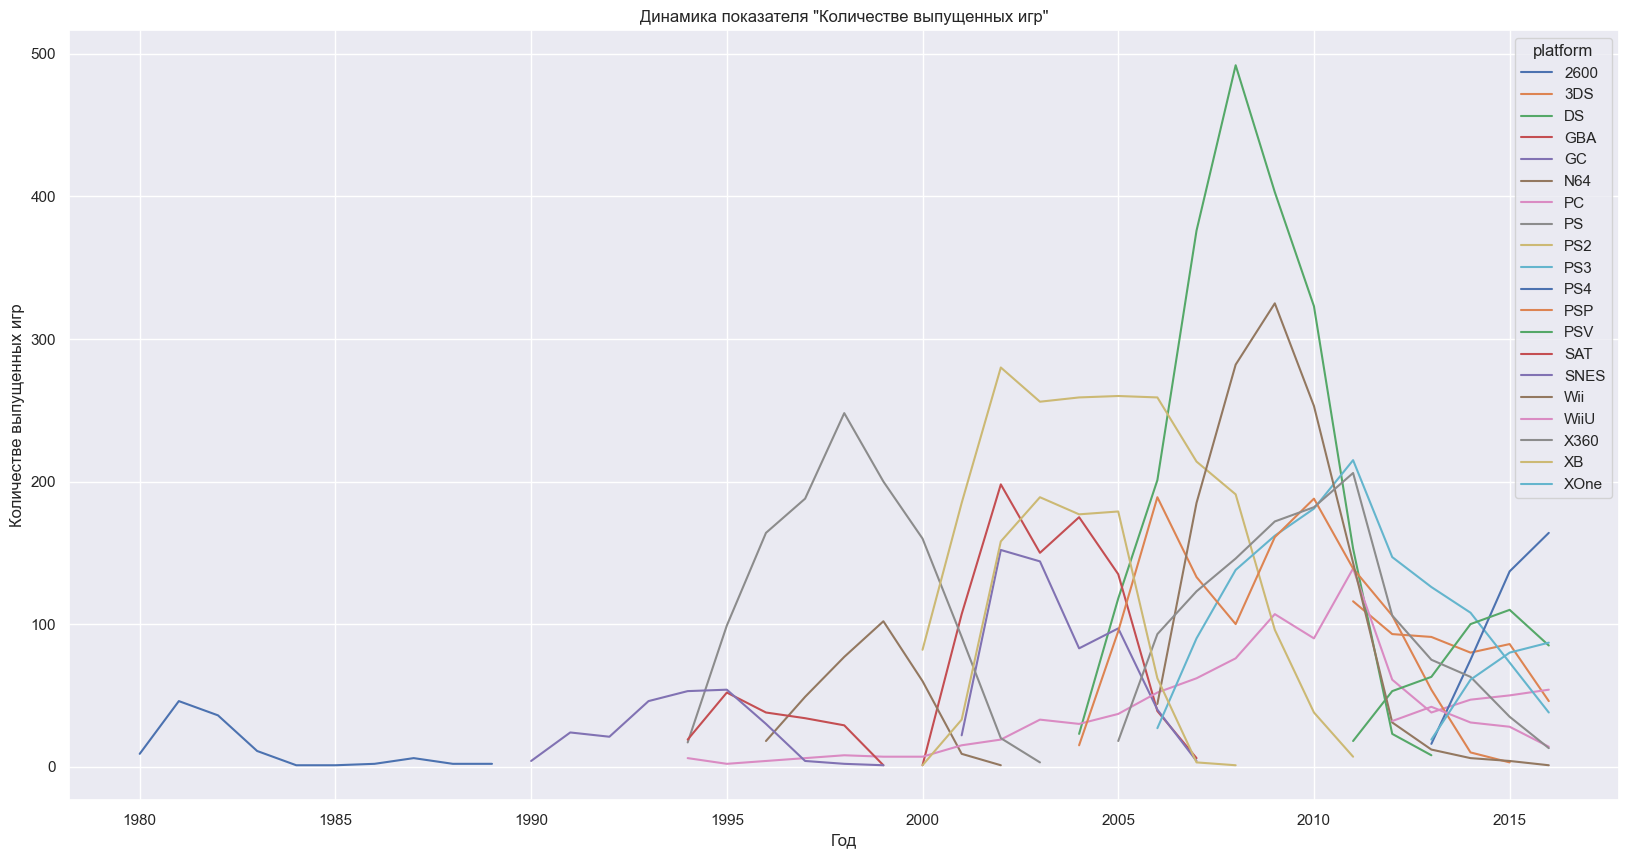

In [40]:
games_graph(games, 'platform', 'name', 'nunique', 'Количестве выпущенных игр')

Данный график демонстрирует нам, что для большинства платформ характерен жизненный цикл, при котором сперва 2-3 года происходит бурный рост числа выпущенных игр, а затем похожий по темпу спад, общая продолжительность жизненного цикла при этом составляет от 5 до 10 лет. Исключений 2: 
1) поколение консолей, к которому принадлежала PS2, которое после достижения пиковых значений еще несколько лет удерживало плато (дольше всех сама PS2); <br>
2) ПК, который перманентно присутствует на рынке видеоигр, имеет свои спады и подъемы, но никуда не уходит. 


[Вернуться к оглавлению](#title)

<a id="learning"></a>

### Анализ продаж за актуальный период

Итак, далее мы работает с данными только с 2013 года, когда зарелизилось поколение консолей, к которому принадлежит PS4.

In [41]:
actual_games = games[games['year_of_release'] >= 2013]

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


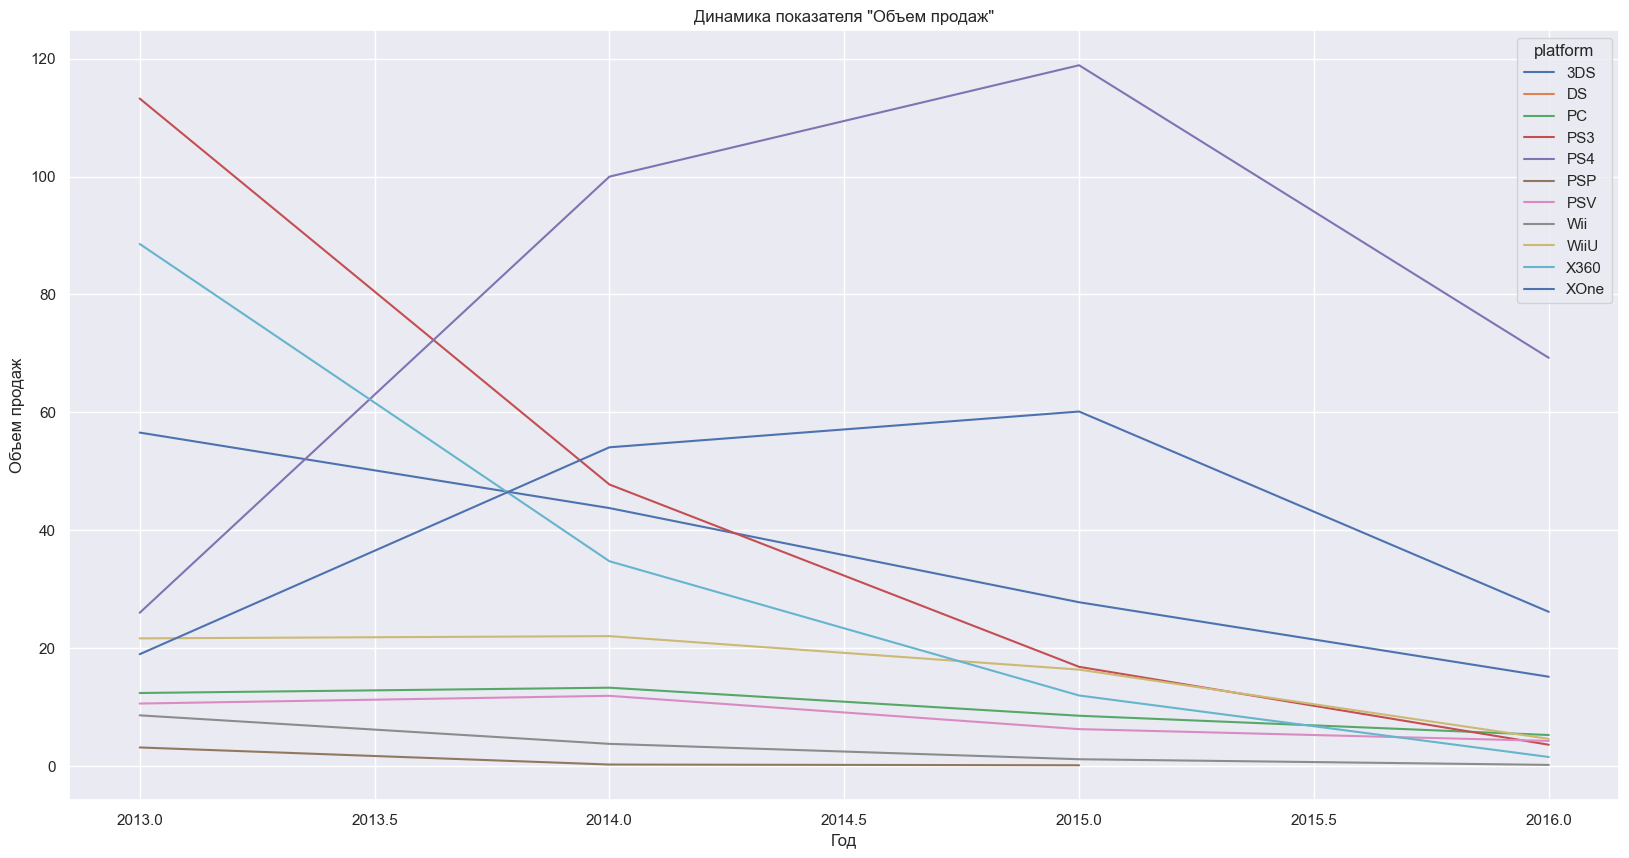

In [42]:
games_graph(actual_games, 'platform', 'total_sales', 'sum', 'Объем продаж')

Мы видим, что на графике есть растущие платформы (текущее поколение) и платформы, на которых продажи падают (прошлое поколение).

Text(0.5, 1.0, 'Сравнение платформ по объему продаж видеоигра')

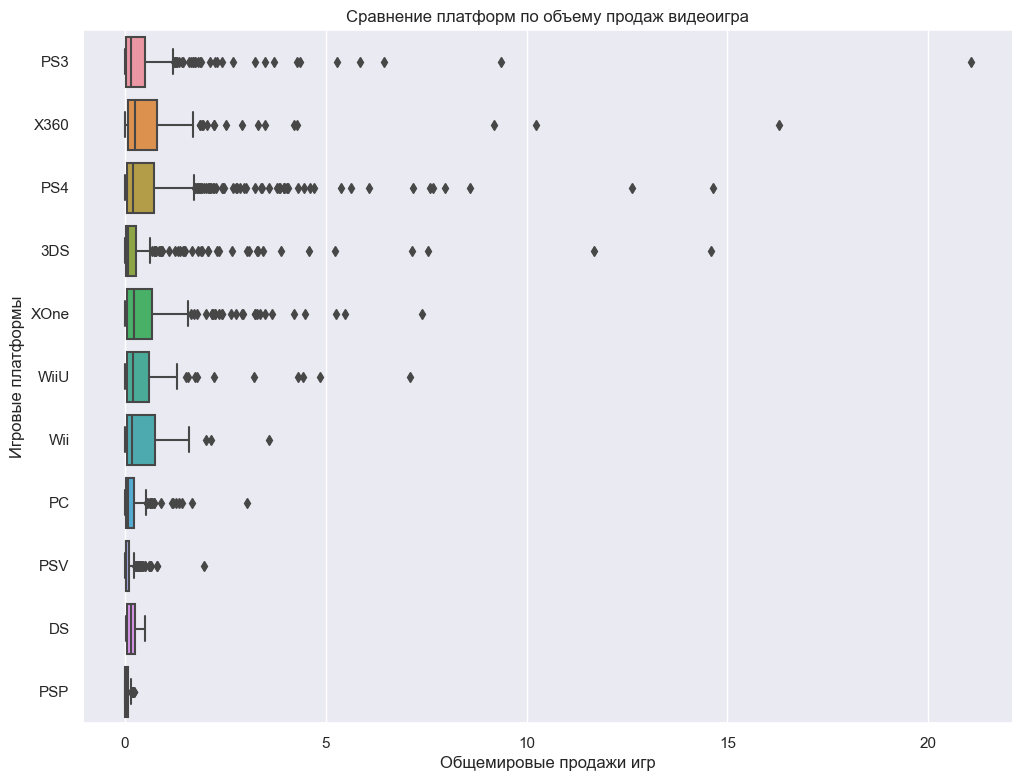

In [43]:
sns.boxplot(data = actual_games, x = 'total_sales', y = 'platform')
plt.xlabel('Общемировые продажи игр')
plt.ylabel('Игровые платформы')
plt.title('Сравнение платформ по объему продаж видеоигра')

Text(0.5, 1.0, 'Сравнение платформ по объему продаж видеоигр')

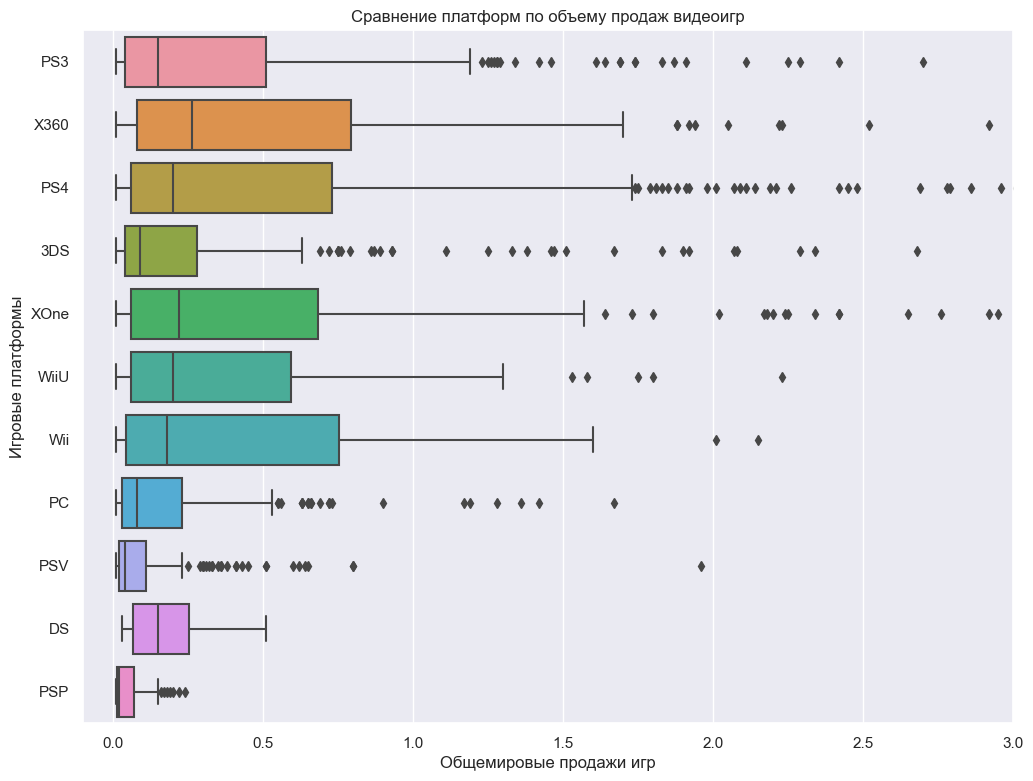

In [44]:
ax = sns.boxplot(data = actual_games, x = 'total_sales', y = 'platform')
ax.set_xlim([-0.1, 3])
plt.xlabel('Общемировые продажи игр')
plt.ylabel('Игровые платформы')
plt.title('Сравнение платформ по объему продаж видеоигр')

На графике мы видим, что у Сони уже произошла смена поколений, и ПС4 обогнала предшественницу, у Майкрософт лучшие продажи пока демонстрирует Х360, аналогично у Нинтендо Wii показывает результаты лучше, чем полупортативная WiiU.

Видим, что пока не вышел Свитч продажи на портативных девайсах сильно уступали полноформатным игровым устройствам.

ПК в обозреваемый период демонстрирует довольно слабые результаты.

Несмотря на то, что прошлое поколение консолей в обозреваемый период все еще дает хорошие продажи, анализировать его не стоит, потому что эти данные абсолютно не подойдут для прогнозирования - поколение уходит, что нам демонстрирует динамика с графика выше.
Получается, что потенциально прибылье устройства это:
- PS4
- Xbox One
- WiiU
- ПК (не самые лучшие результаты, но в отличии от консолей эта платформа не перестанет существовать с концом поколения)

Далее возьмем PS4 как главную платформу исследуемого периода.


[Вернуться к оглавлению](#title)

<a id="ratings"></a>

### Влияние оценок пользователей и критиков

Text(0.5, 1.0, 'Взаимосвязь оценок критиков и объемов продаж на ПС4')

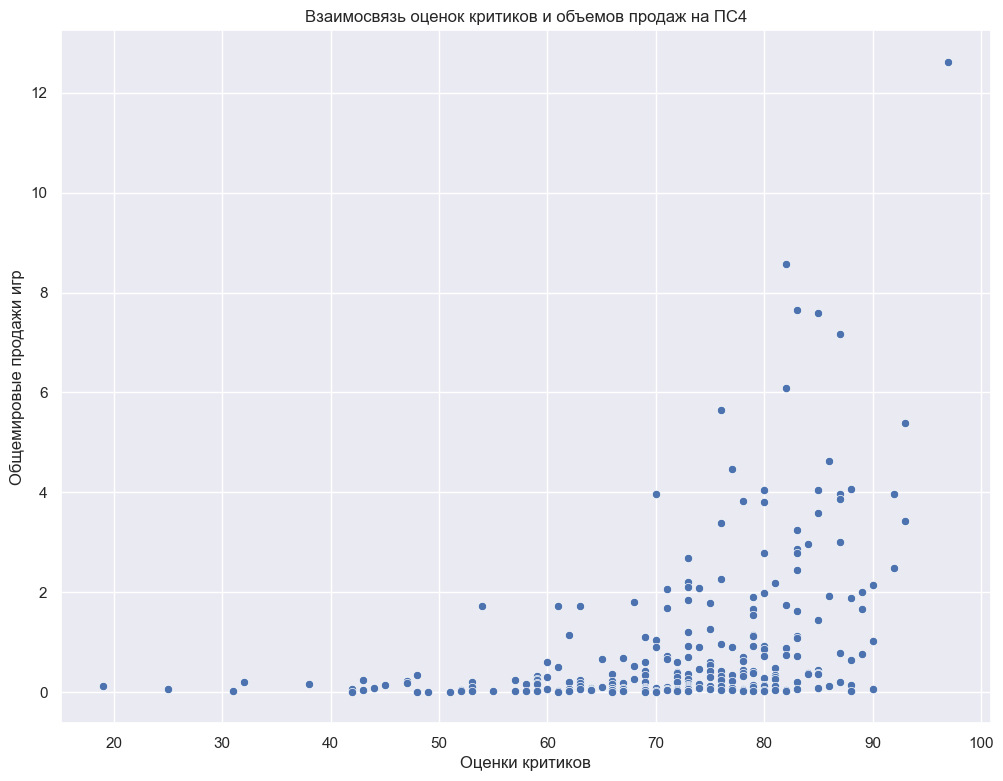

In [45]:
sns.scatterplot(data = actual_games.query('platform == "PS4" & critic_score > 0'), x = 'critic_score', y = 'total_sales')
plt.xlabel('Оценки критиков')
plt.ylabel('Общемировые продажи игр')
plt.title('Взаимосвязь оценок критиков и объемов продаж на ПС4')

Text(0.5, 1.0, 'Взаимосвязь оценок игроков и объемов продаж на ПС4')

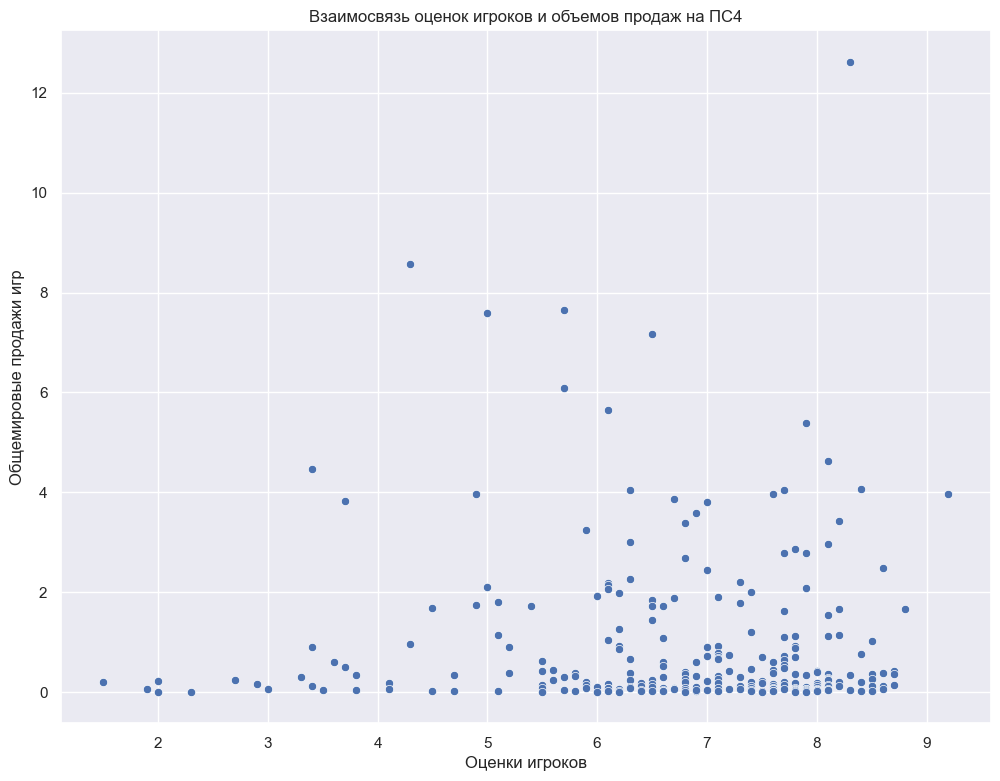

In [46]:
sns.scatterplot(data = actual_games.query('platform == "PS4" & user_score > 0'), x = 'user_score', y = 'total_sales')
plt.xlabel('Оценки игроков')
plt.ylabel('Общемировые продажи игр')
plt.title('Взаимосвязь оценок игроков и объемов продаж на ПС4')

In [47]:
display(actual_games.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']].corr().style.background_gradient('coolwarm'))

,total_sales,critic_score,user_score
total_sales,1.000000,0.226526,0.115961
critic_score,0.226526,1.000000,0.907449
user_score,0.115961,0.907449,1.000000


Корреляцию между оценками и продажами можно оценивать как очень слабую, и связь наблюдается скорее у проектов, которые получили высокие оценки критиков. Однако, говорить о наличии каузации мы не можем, скорее просто качественные игры, вроде эксклюзивов Сони, хорошо продались и получили высокие оценки критиков просто потому что они качественные.

Text(0.5, 1.0, 'Взаимосвязь оценок критиков и объемов продаж на Xbox One')

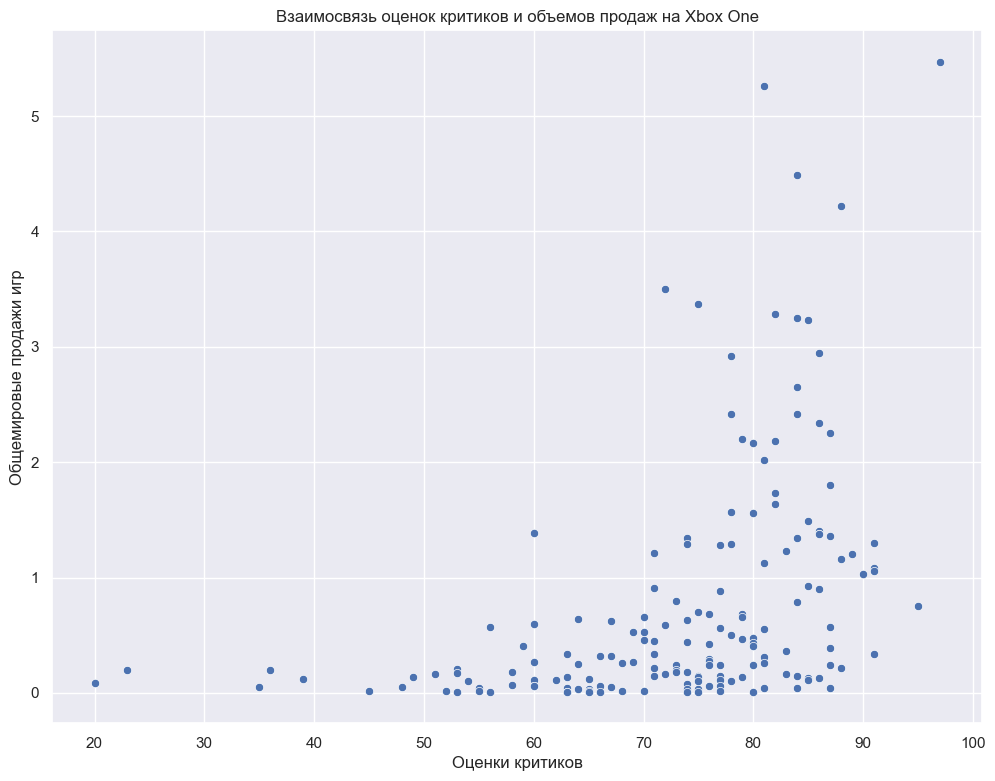

In [48]:
sns.scatterplot(data = actual_games.query('platform == "XOne" & critic_score > 0'), x = 'critic_score', y = 'total_sales')
plt.xlabel('Оценки критиков')
plt.ylabel('Общемировые продажи игр')
plt.title('Взаимосвязь оценок критиков и объемов продаж на Xbox One')

Text(0.5, 1.0, 'Взаимосвязь оценок игроков и объемов продаж на Xbox One')

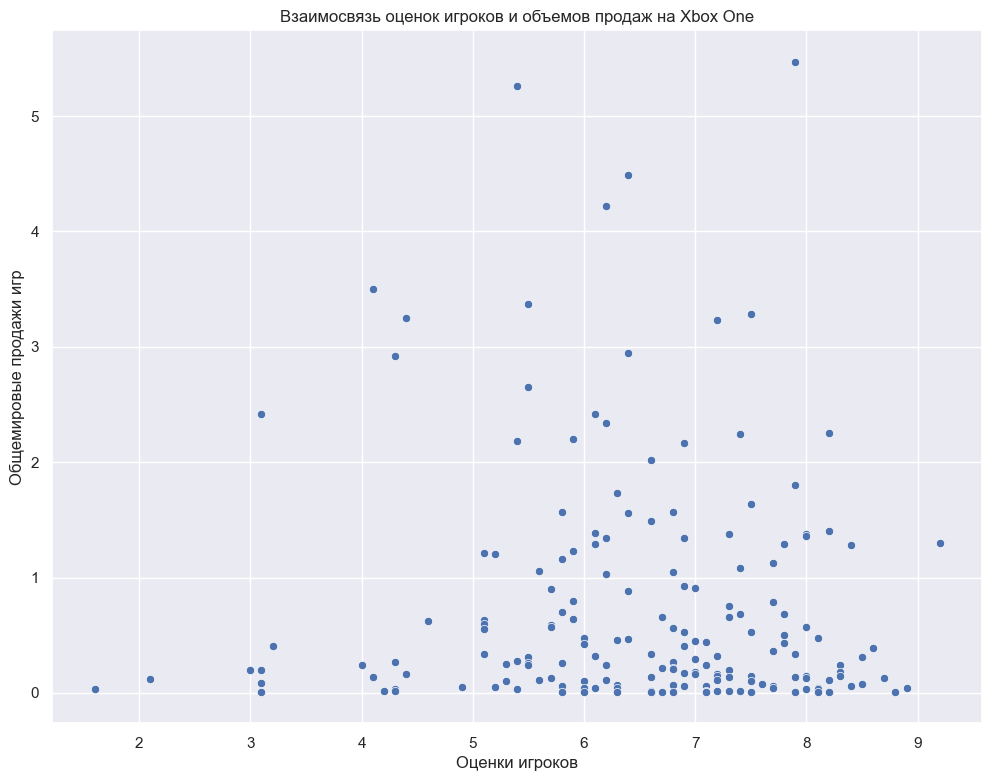

In [49]:
sns.scatterplot(data = actual_games.query('platform == "XOne" & user_score > 0'), x = 'user_score', y = 'total_sales')
plt.xlabel('Оценки игроков')
plt.ylabel('Общемировые продажи игр')
plt.title('Взаимосвязь оценок игроков и объемов продаж на Xbox One')

In [50]:
display(actual_games.query('platform == "XOne"')[['total_sales', 'critic_score', 'user_score']].corr().style.background_gradient('coolwarm'))

,total_sales,critic_score,user_score
total_sales,1.000000,0.273782,0.121712
critic_score,0.273782,1.000000,0.781040
user_score,0.121712,0.781040,1.000000


У Иксбокса связь еще менее выраженная.

Text(0.5, 1.0, 'Взаимосвязь оценок критиков и объемов продаж на ПК')

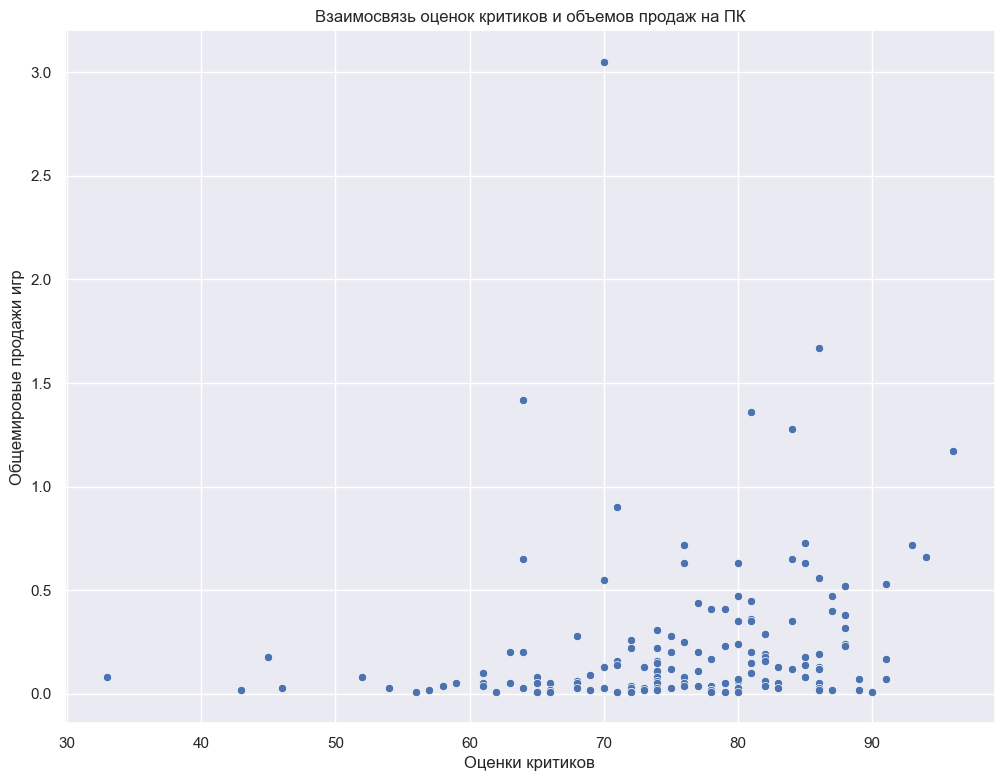

In [51]:
sns.scatterplot(data = actual_games.query('platform == "PC" & critic_score > 0'), x = 'critic_score', y = 'total_sales')
plt.xlabel('Оценки критиков')
plt.ylabel('Общемировые продажи игр')
plt.title('Взаимосвязь оценок критиков и объемов продаж на ПК')

Text(0.5, 1.0, 'Взаимосвязь оценок игроков и объемов продаж на ПК')

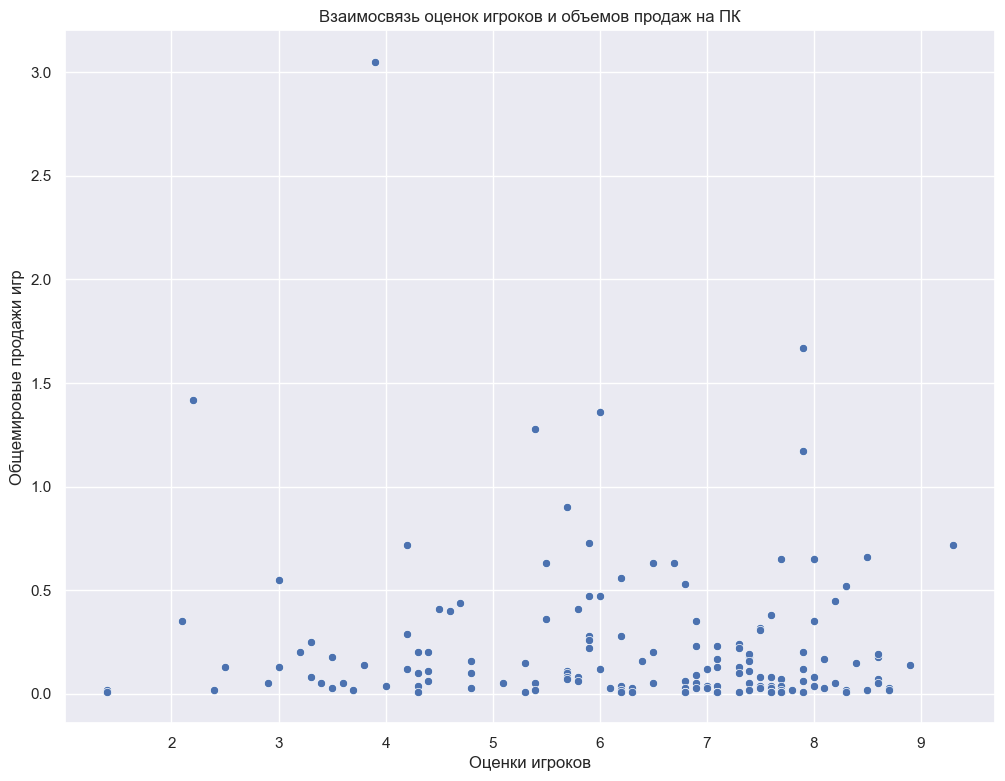

In [52]:
sns.scatterplot(data = actual_games.query('platform == "PC" & user_score > 0'), x = 'user_score', y = 'total_sales')
plt.xlabel('Оценки игроков')
plt.ylabel('Общемировые продажи игр')
plt.title('Взаимосвязь оценок игроков и объемов продаж на ПК')

In [53]:
display(actual_games.query('platform == "PC"')[['total_sales', 'critic_score', 'user_score']].corr().style.background_gradient('coolwarm'))

,total_sales,critic_score,user_score
total_sales,1.000000,0.185205,0.049492
critic_score,0.185205,1.000000,0.805689
user_score,0.049492,0.805689,1.000000


Аналогично на ПК.

Text(0.5, 1.0, 'Взаимосвязь оценок критиков и объемов продаж на WiiU')

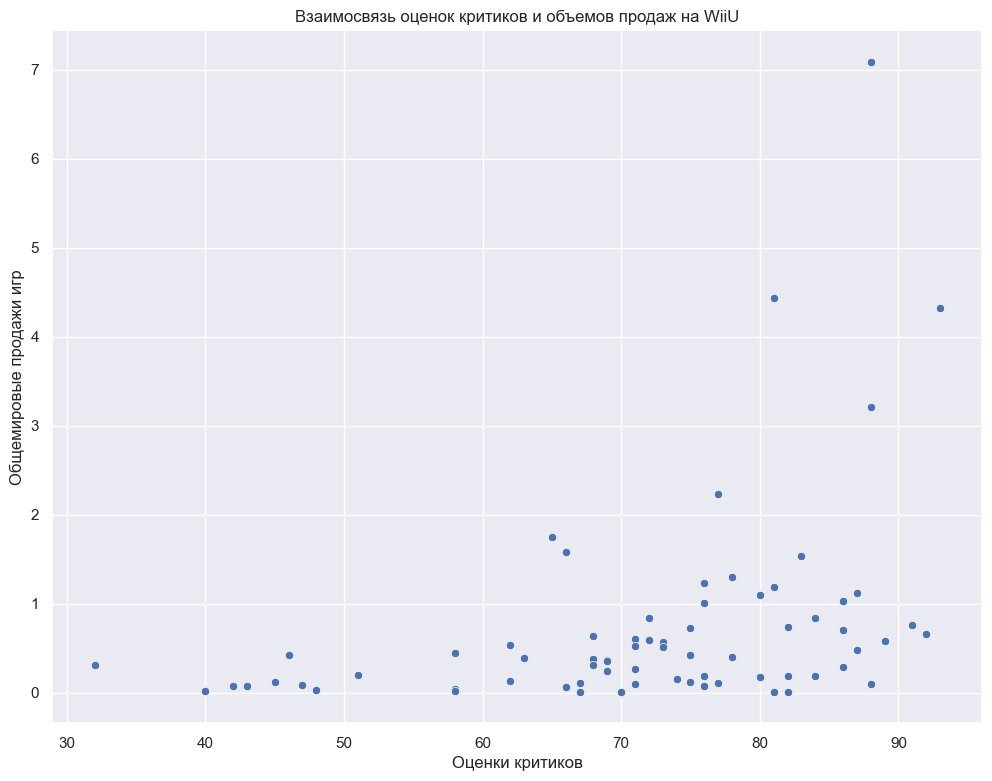

In [54]:
sns.scatterplot(data = actual_games.query('platform == "WiiU" & critic_score > 0'), x = 'critic_score', y = 'total_sales')
plt.xlabel('Оценки критиков')
plt.ylabel('Общемировые продажи игр')
plt.title('Взаимосвязь оценок критиков и объемов продаж на WiiU')

Text(0.5, 1.0, 'Взаимосвязь оценок критиков и объемов продаж на WiiU')

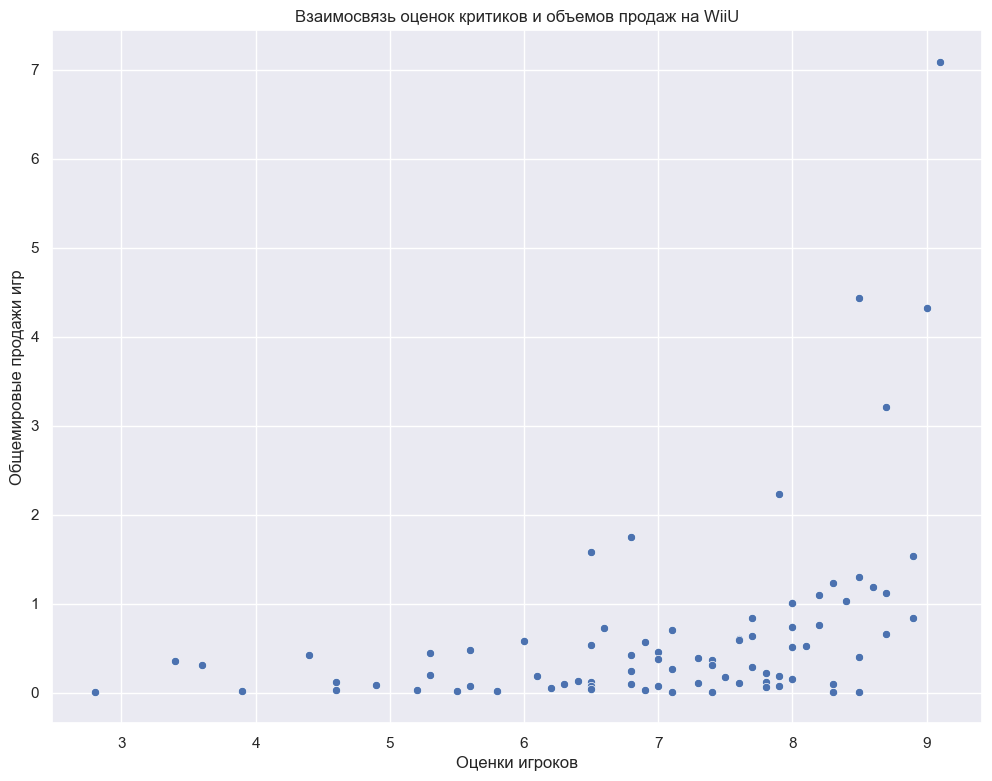

In [55]:
sns.scatterplot(data = actual_games.query('platform == "WiiU" & user_score > 0'), x = 'user_score', y = 'total_sales')
plt.xlabel('Оценки игроков')
plt.ylabel('Общемировые продажи игр')
plt.title('Взаимосвязь оценок критиков и объемов продаж на WiiU')

In [56]:
display(actual_games.query('platform == "WiiU"')[['total_sales', 'critic_score', 'user_score']].corr().style.background_gradient('coolwarm'))

,total_sales,critic_score,user_score
total_sales,1.000000,0.293181,0.240404
critic_score,0.293181,1.000000,0.828502
user_score,0.240404,0.828502,1.000000


У платформ Нинтендо оценки критиков и пользователей довольно сильно скоррелированы, но все равно не связаны с итоговыми продажами.

Итого, по итогам обзора всех актуальных популярных платформ мы можем сказать, что корреляция между оценками игроков/критиков и результатами продаж очень слабая.


[Вернуться к оглавлению](#title)

<a id="genre_distr"></a>

### Распределение релизов и продаж по жанрам

In [57]:
def pie_cat(df, category, name, value, func): 
    temp_df3 = df.pivot_table(index = category, values = value, aggfunc = func)
    temp_df3.plot.pie(y=value, figsize=(10, 10), autopct="%.1f%%")
    plt.title('Распределение переменной {} по {}'.format(name, category))
    plt.show()

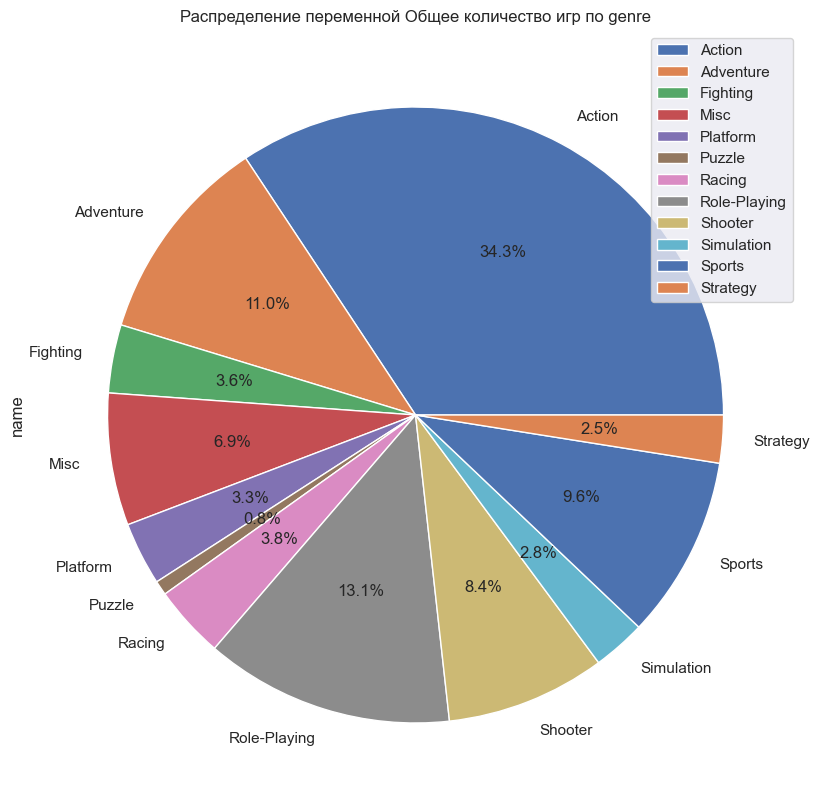

In [58]:
pie_cat (actual_games, 'genre', 'Общее количество игр', 'name', 'count')

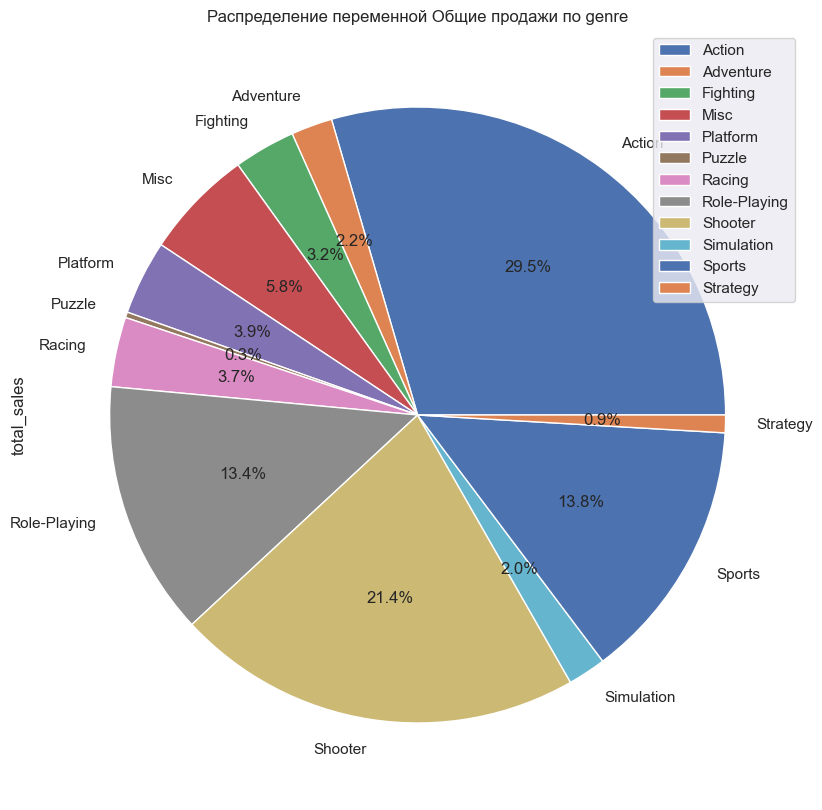

In [59]:
pie_cat (actual_games, 'genre', 'Общие продажи', 'total_sales', 'sum')

Итак, сравнив распределение количества игр по жанрам и продаж по ним, мы сразу видим:
1) несколько важнейших жанров - Экшен, Спорт, Шутер, РПГ<br>
2) Множество мелких<br>
3) несоответствие количества игр их продажам - Шутеры и Спорт продаются очень хорошо

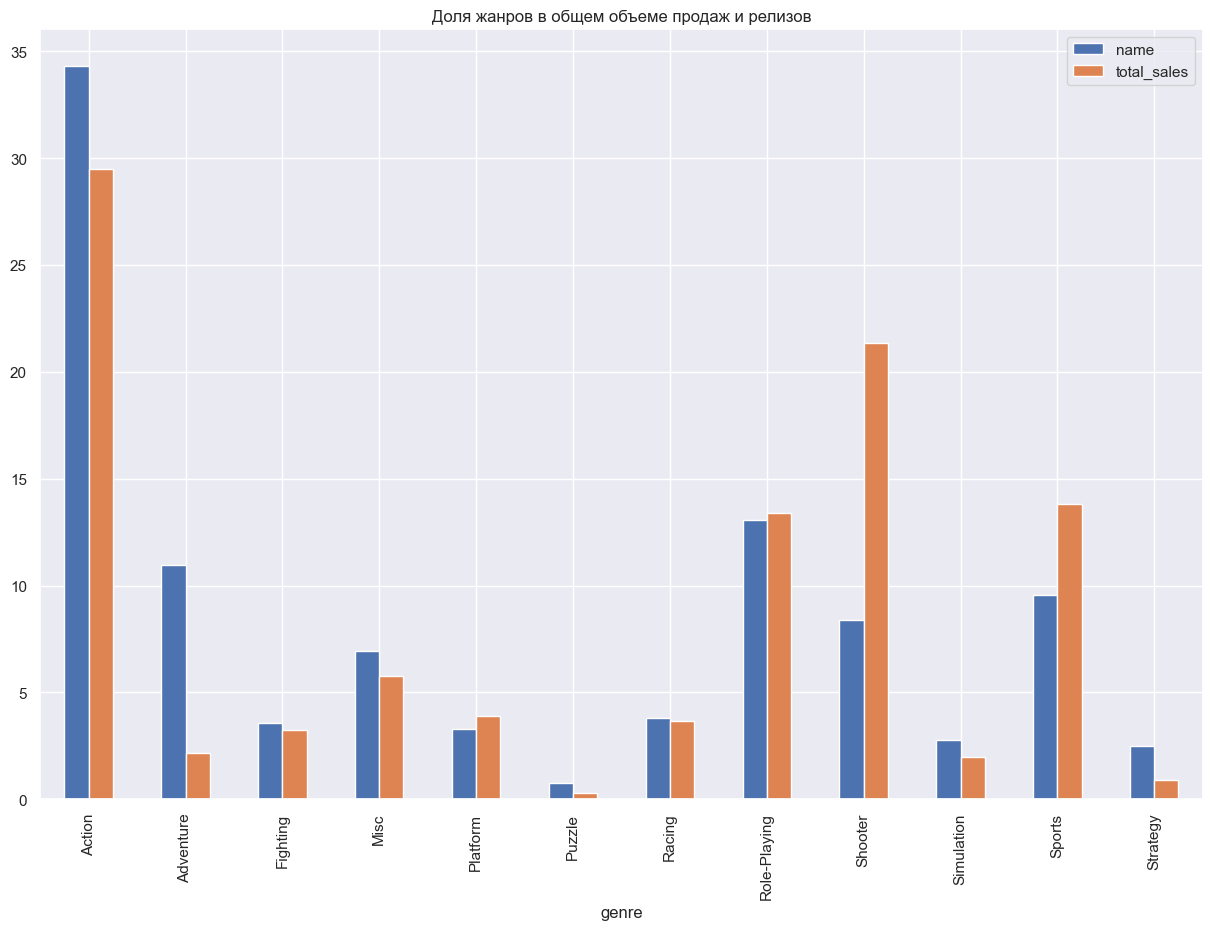

In [60]:
temp_df4 = actual_games.pivot_table(index = 'genre', values = ['name', 'total_sales'], aggfunc = {'name':'count', 'total_sales':'sum'})
temp_df4['name'] = temp_df4['name']/temp_df4['name'].sum()*100
temp_df4['total_sales'] = temp_df4['total_sales']/temp_df4['total_sales'].sum()*100
temp_df4.plot.bar(figsize = (15,10))
plt.title('Доля жанров в общем объеме продаж и релизов')
ax.set_xlabel('Жанры', fontsize=15)
ax.set_ylabel('Доля', fontsize=15)
plt.show()

Больше всех при переходе количества релизов в объем продаж страдаю адвентчуры (причины не очень понятны) и стратегии (очень узкий жанр).

Далее необходимо изучить средние показатели по жанрам

Text(0.5, 1.0, 'Сравнение жанров по объему продаж видеоигр')

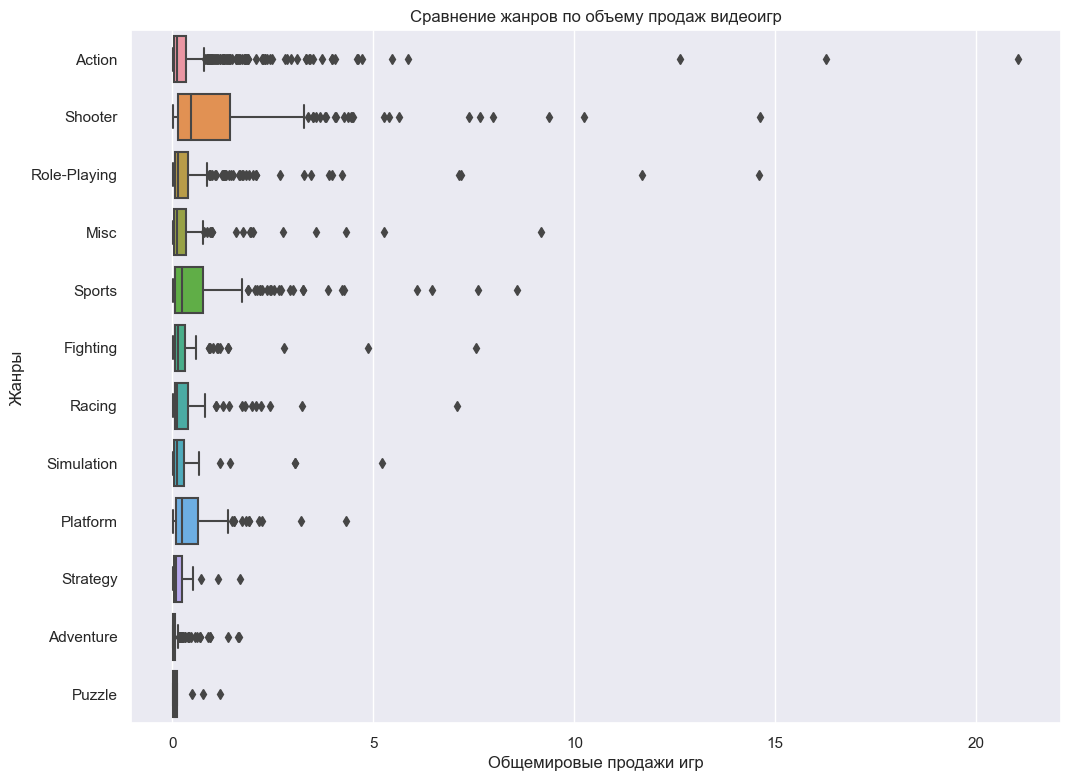

In [61]:
ax = sns.boxplot(data = actual_games, x = 'total_sales', y = 'genre')
#ax.set_xlim([-0.1, 3])
plt.xlabel('Общемировые продажи игр')
plt.ylabel('Жанры')
plt.title('Сравнение жанров по объему продаж видеоигр')

Text(0.5, 1.0, 'Сравнение жанров по объему продаж видеоигр')

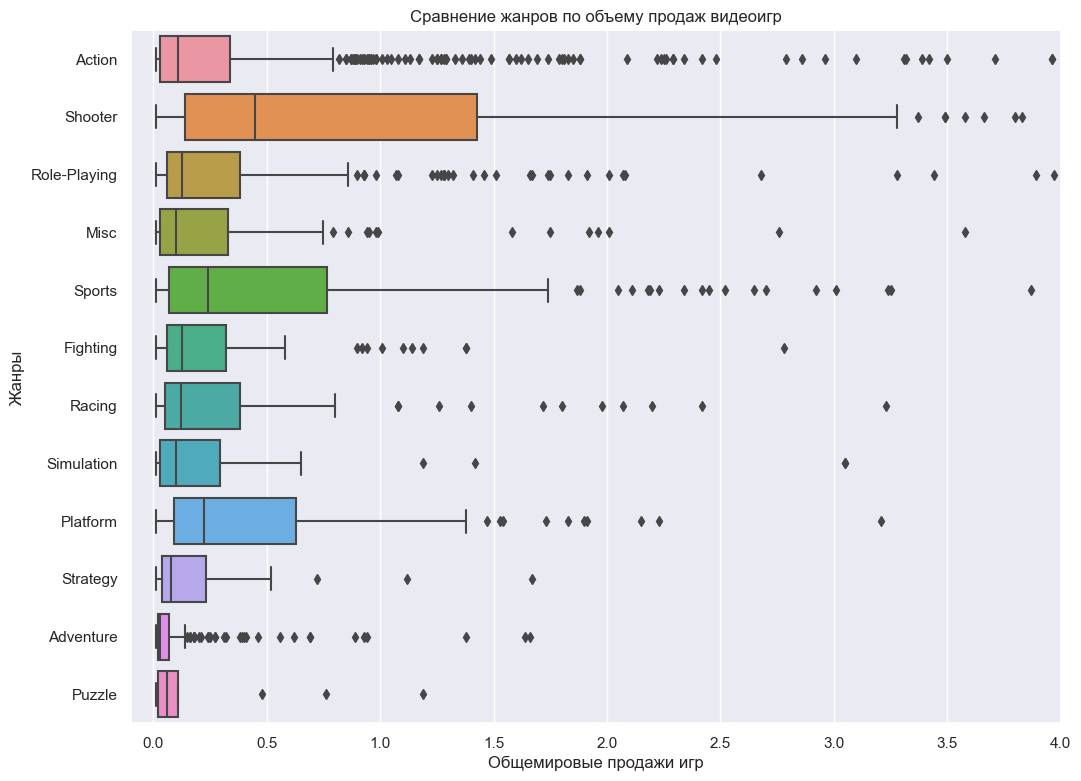

In [62]:
ax = sns.boxplot(data = actual_games, x = 'total_sales', y = 'genre')
ax.set_xlim([-0.1, 4])
plt.xlabel('Общемировые продажи игр')
plt.ylabel('Жанры')
plt.title('Сравнение жанров по объему продаж видеоигр')

Мы видим, что успешность жанра экшен создаетс скорее за счет выбросов, а на самом деле очень успешны шутеры, спортивные игры и, неожиданно, платформеры.

[Вернуться к оглавлению](#title)

<a id="second_conclusion"></a>

### Промежуточный вывод

ИТОГО:
- Цикл жизни платформ составляет в среднем от 5 до 10 лет, дольше всех жило позапрошлое поколение с PS2
- ПК вечен, но малопопулярен
- На момент анализа самые популярные платформы это свежие устройства от Сони и Майкрософт - PS4 и Xbox 360, ПК продолжает занимать свою нишу, у Нинтендо это WII.
- Однако, чтобы анализ имел прогнозную силу нам необходимы данные только по свежему поколению: PS4, Xbox One, WiiU и ПК. 
- Корреляция между оценками критиков и пользователей с общим объемом продаж - очень слабая положительная.
- Шутеры, спортивные игры и платформеры продаются лучше других жанров. 

[Вернуться к оглавлению](#title)

<a id="third_step"></a>

## Портреты пользователей по регионам

### Топ платформ

In [63]:
actual_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
eu_sales,7.893,0.217,6.466,17.288,35.971,0.043,1.555,1.512,5.061,10.841,13.153
jp_sales,48.167,0.000,0.000,16.586,11.337,2.337,13.205,0.036,7.728,0.362,0.242
na_sales,8.727,0.130,2.538,14.507,24.843,0.000,1.151,1.499,6.673,18.656,21.274
other_sales,5.235,0.100,2.467,22.314,40.302,0.033,2.717,0.934,3.909,10.094,11.895
total_sales,13.134,0.141,3.615,16.634,28.802,0.321,3.025,1.252,5.926,12.543,14.607


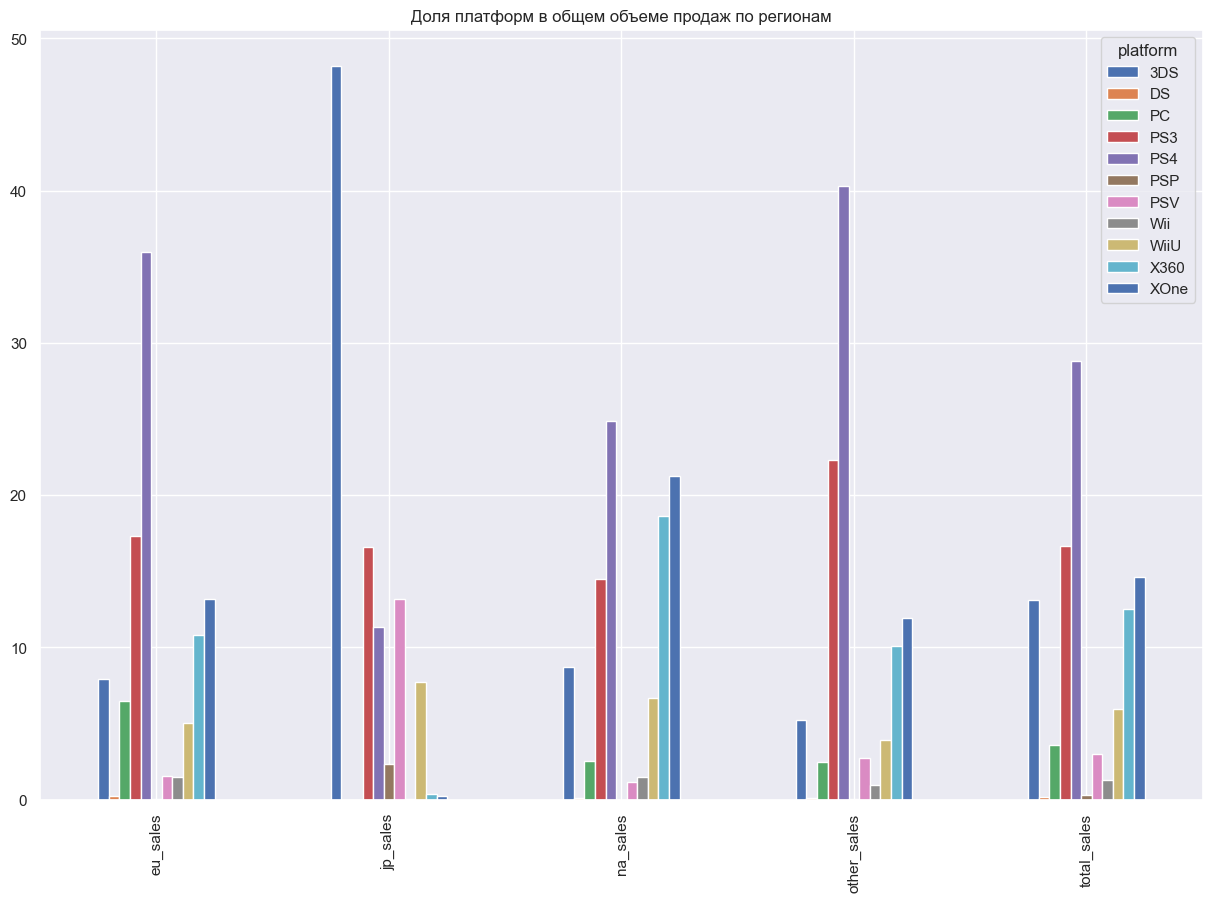

In [64]:
temp_df5 = actual_games.pivot_table(index = 'platform', values = ['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum')
temp_df5 = temp_df5[temp_df5['total_sales']>0]
temp_df5['total_sales'] = temp_df5['total_sales']/temp_df5['total_sales'].sum()*100
temp_df5['na_sales'] = temp_df5['na_sales']/temp_df5['na_sales'].sum()*100
temp_df5['eu_sales'] = temp_df5['eu_sales']/temp_df5['eu_sales'].sum()*100
temp_df5['jp_sales'] = temp_df5['jp_sales']/temp_df5['jp_sales'].sum()*100
temp_df5['other_sales'] = temp_df5['other_sales']/temp_df5['other_sales'].sum()*100
temp_df5 = temp_df5.transpose()

display(temp_df5)
temp_df5.plot.bar(figsize = (15,10))
plt.title('Доля платформ в общем объеме продаж по регионам')
ax.set_xlabel('Платформы', fontsize=15)
ax.set_ylabel('Доля, %', fontsize=15)
plt.show()

График относительных значений демонстрирует нам, что:
- Японские полноформатные платформы популярны во всеми мире и особенно в Японии. 
- В самой Японии более популярны консоли портативные, нежели полноформатные.
- Продукция Майкрософт более популярна на Западе - в Сев. Америке и Европе, однако все равно уступает Сони. Портативные консоли на этих рынках представлены относительно слабо. 
- ПК имеет более менее значающую что-то долю только на Европейском рынке.  

In [65]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

d = {'index':[1, 2, 3, 4, 5]}
temp_df7 = pd.DataFrame(data = d)

for r in regions:
    temp_df6 = actual_games.pivot_table(index = 'platform', values = r, aggfunc = 'sum')
    temp_df6 = temp_df6.sort_values(by = r, ascending = False)
    temp_df6 = temp_df6.reset_index(level = 0)
    temp_df6 = temp_df6.loc[0:5]
    temp_df6 = temp_df6.drop(r, axis = 1)
    temp_df6.columns = [r]
    temp_df7 = temp_df7.join(temp_df6)

print ('Топ-5 платформ по продажам в разных регионах')
temp_df7

Топ-5 платформ по продажам в разных регионах


,index,na_sales,eu_sales,jp_sales,other_sales
0,1,PS4,PS4,3DS,PS4
1,2,XOne,PS3,PS3,PS3
2,3,X360,XOne,PSV,XOne
3,4,PS3,X360,PS4,X360
4,5,3DS,3DS,WiiU,3DS


Таблица, построенная на абсолютных значениях демонстрирует за обозреваемый период уходящее лидерство предыдущего поколения консолей. 

In [66]:
temp_df5['pastgen'] = temp_df5[['PS3', 'X360', 'Wii']].sum(axis = 1) 
temp_df5['others'] = temp_df5[['3DS', 'DS', 'PSP', 'PSV']].sum(axis = 1)
temp_df5 = temp_df5.drop(['3DS', 'DS', 'PSP', 'PSV', 'PS3', 'X360', 'Wii'], axis = 1)

In [67]:
temp_df5 = temp_df5.transpose()
temp_df5

,eu_sales,jp_sales,na_sales,other_sales,total_sales
platform,,,,,
PC,6.466,0.000,2.538,2.467,3.615
PS4,35.971,11.337,24.843,40.302,28.802
WiiU,5.061,7.728,6.673,3.909,5.926
XOne,13.153,0.242,21.274,11.895,14.607
pastgen,29.641,16.984,34.662,33.342,30.429
others,9.709,63.709,10.009,8.085,16.621


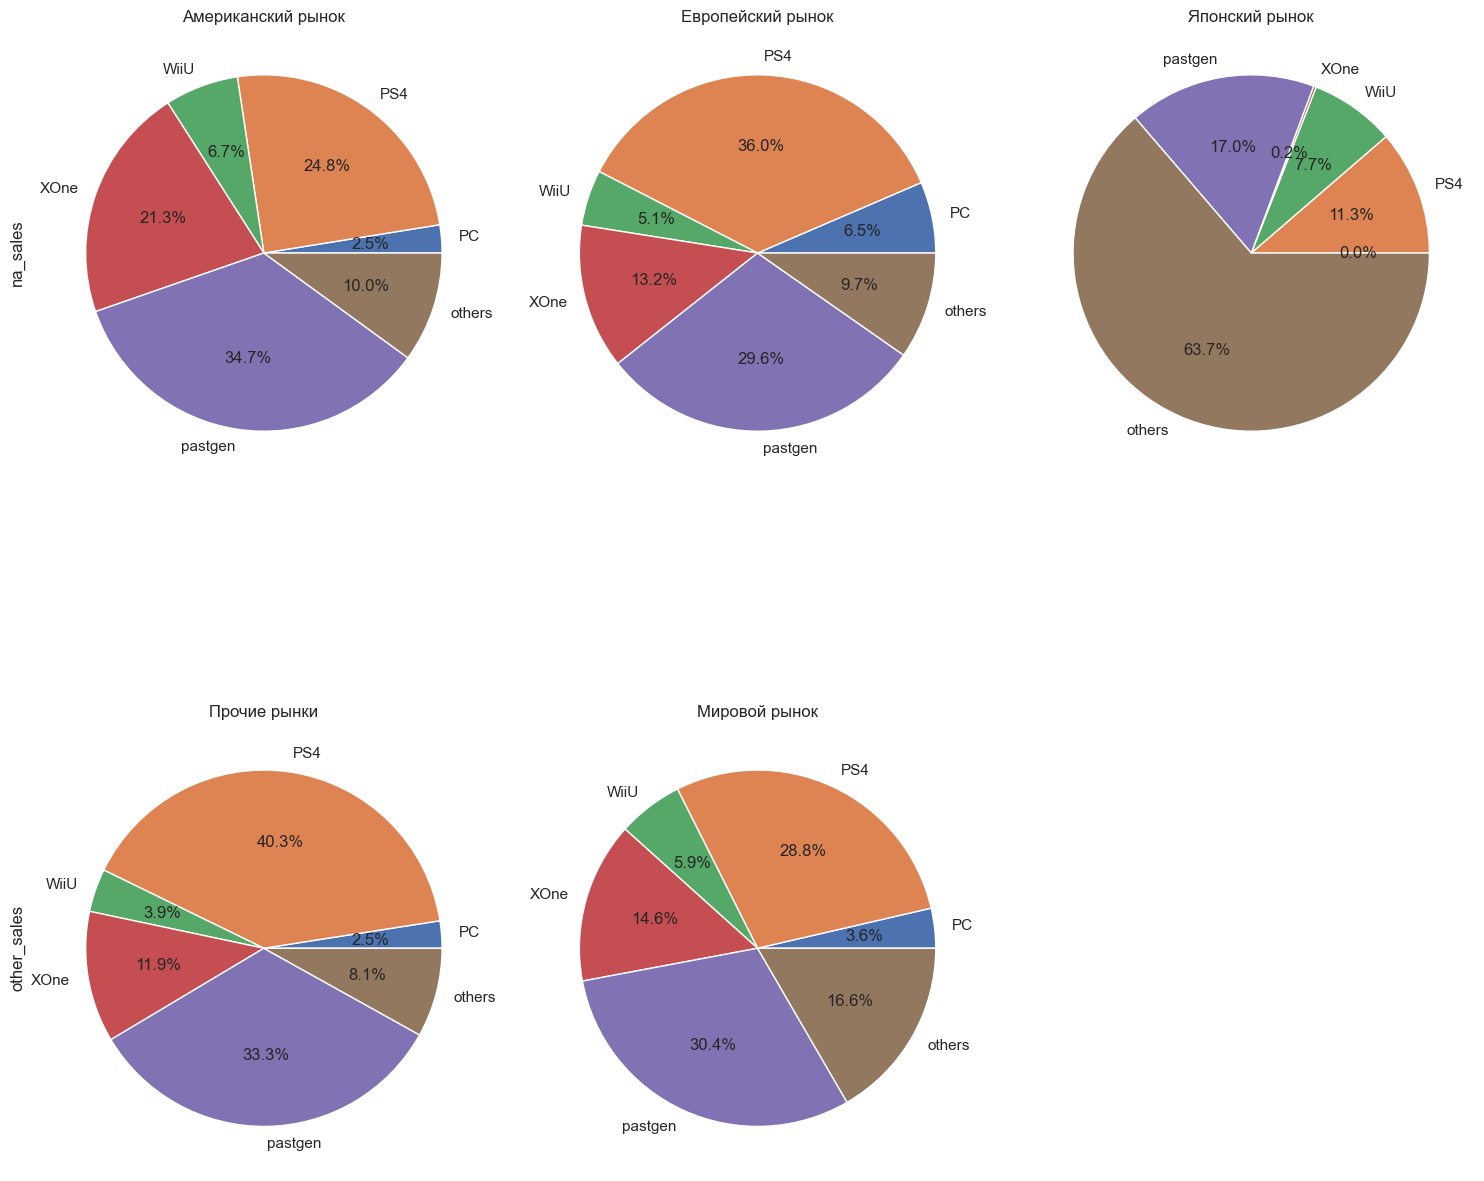

In [68]:
plt.figure(figsize=(45, 30))

ax1 = plt.subplot(2, 3, 1)
temp_df5.plot.pie(y='na_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax1)
plt.title('Американский рынок')

ax2 = plt.subplot(2, 3, 2, sharey=ax1)
temp_df5.plot.pie(y='eu_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax2)
plt.title('Европейский рынок')

ax3 = plt.subplot(2, 3, 3, sharey=ax1)
temp_df5.plot.pie(y='jp_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax3)
plt.title('Японский рынок')

ax4 = plt.subplot(2, 3, 4)
temp_df5.plot.pie(y='other_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax4)
plt.title('Прочие рынки')

ax5 = plt.subplot(2, 3, 5, sharey=ax4)
temp_df5.plot.pie(y='total_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax5)
plt.title('Мировой рынок')

plt.tight_layout()
plt.show()

Вышеприведенный график визуализирует информацию с укрупненными категориями. Мы видим, что европейский рынок - самый современный, в нем наименьшая доля прочих и устаревших устройств, на нем же и высочайшая доля ПС4, если не считать мировые рынки. Американский рынок центральный для иксбокс. Японский рынок - особенный. "Прочие рынки" в целом больше всего напоминают рынок европейский.

[Вернуться к оглавлению](#title)

<a id="hierarchy"></a>

### Топ жанров

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
eu_sales,30.118,2.103,2.180,5.109,3.972,0.255,5.147,9.426,22.400,2.784,15.430,1.076
jp_sales,28.761,4.134,5.434,6.535,3.402,0.838,1.634,36.255,4.695,3.211,3.843,1.257
na_sales,28.798,1.631,3.553,6.280,4.144,0.190,2.961,10.601,25.071,1.110,14.912,0.749
other_sales,31.008,2.026,2.967,5.076,3.434,0.133,3.701,9.569,23.981,1.217,16.212,0.675
total_sales,29.511,2.167,3.237,5.760,3.909,0.291,3.657,13.376,21.361,1.995,13.812,0.924


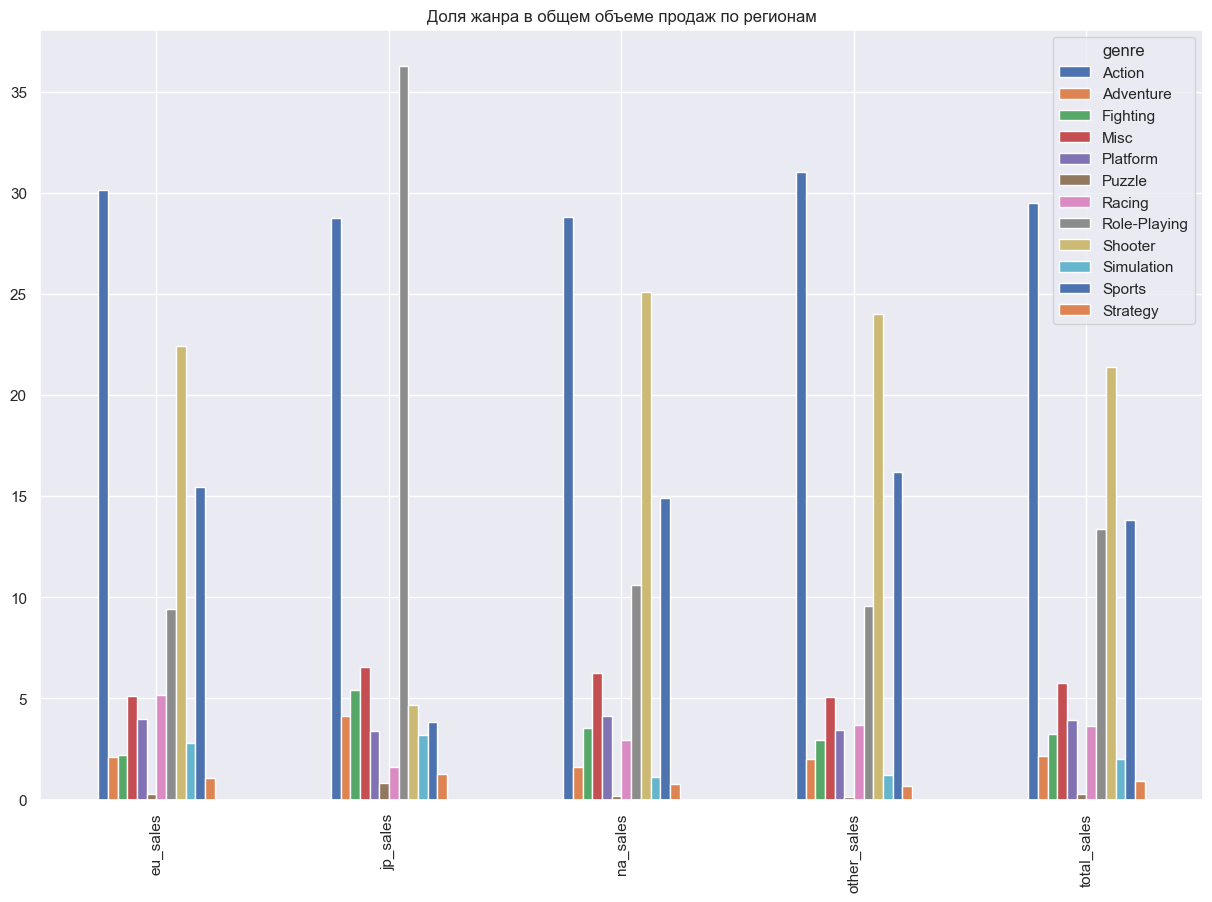

In [69]:
temp_df5 = actual_games.pivot_table(index = 'genre', values = ['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum')
temp_df5 = temp_df5[temp_df5['total_sales']>0]
temp_df5['total_sales'] = temp_df5['total_sales']/temp_df5['total_sales'].sum()*100
temp_df5['na_sales'] = temp_df5['na_sales']/temp_df5['na_sales'].sum()*100
temp_df5['eu_sales'] = temp_df5['eu_sales']/temp_df5['eu_sales'].sum()*100
temp_df5['jp_sales'] = temp_df5['jp_sales']/temp_df5['jp_sales'].sum()*100
temp_df5['other_sales'] = temp_df5['other_sales']/temp_df5['other_sales'].sum()*100
temp_df5 = temp_df5.transpose()
display(temp_df5)
temp_df5.plot.bar(figsize = (15,10))
plt.title('Доля жанра в общем объеме продаж по регионам')
ax.set_xlabel('Жанры', fontsize=15)
ax.set_ylabel('Доля, %', fontsize=15)
plt.show()

График относительных значений демонстрирует нам, что:
- Экшены, шутеры и спортивные игры популярны везде, кроме Японии
- В Японии рынок, как мы уже убедились, особый, поэтому там самая популярная категория - это РПГ (существует даже отдельный поджанр JRPG), и только затем уже идут экшены. 

In [70]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

d = {'index':[1, 2, 3, 4, 5]}
temp_df7 = pd.DataFrame(data = d)

for r in regions:
    temp_df6 = actual_games.pivot_table(index = 'genre', values = r, aggfunc = 'sum')
    temp_df6 = temp_df6.sort_values(by = r, ascending = False)
    temp_df6 = temp_df6.reset_index(level = 0)
    temp_df6 = temp_df6.loc[0:5]
    temp_df6 = temp_df6.drop(r, axis = 1)
    temp_df6.columns = [r]
    temp_df7 = temp_df7.join(temp_df6)

print ('Топ-5 жанров по продажам в разных регионах')
temp_df7

Топ-5 жанров по продажам в разных регионах


,index,na_sales,eu_sales,jp_sales,other_sales
0,1,Action,Action,Role-Playing,Action
1,2,Shooter,Shooter,Action,Shooter
2,3,Sports,Sports,Misc,Sports
3,4,Role-Playing,Role-Playing,Fighting,Role-Playing
4,5,Misc,Racing,Shooter,Misc


По сути все регионы кроме Японии в вопросе мейнстримных жанровых предпочтений на самом деле похожи, только у Страны восходящего солнца особый путь.

In [71]:
temp_df5

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
eu_sales,30.118,2.103,2.180,5.109,3.972,0.255,5.147,9.426,22.400,2.784,15.430,1.076
jp_sales,28.761,4.134,5.434,6.535,3.402,0.838,1.634,36.255,4.695,3.211,3.843,1.257
na_sales,28.798,1.631,3.553,6.280,4.144,0.190,2.961,10.601,25.071,1.110,14.912,0.749
other_sales,31.008,2.026,2.967,5.076,3.434,0.133,3.701,9.569,23.981,1.217,16.212,0.675
total_sales,29.511,2.167,3.237,5.760,3.909,0.291,3.657,13.376,21.361,1.995,13.812,0.924


In [72]:
temp_df5['others'] = temp_df5[['Adventure', 'Puzzle', 'Simulation', 'Strategy']].sum(axis = 1)
temp_df5 = temp_df5.drop(['Adventure', 'Puzzle', 'Simulation', 'Strategy'], axis = 1)

In [73]:
temp_df5 = temp_df5.transpose()
temp_df5

,eu_sales,jp_sales,na_sales,other_sales,total_sales
genre,,,,,
Action,30.118,28.761,28.798,31.008,29.511
Fighting,2.180,5.434,3.553,2.967,3.237
Misc,5.109,6.535,6.280,5.076,5.760
Platform,3.972,3.402,4.144,3.434,3.909
Racing,5.147,1.634,2.961,3.701,3.657
Role-Playing,9.426,36.255,10.601,9.569,13.376
Shooter,22.400,4.695,25.071,23.981,21.361
Sports,15.430,3.843,14.912,16.212,13.812
others,6.218,9.440,3.681,4.051,5.377


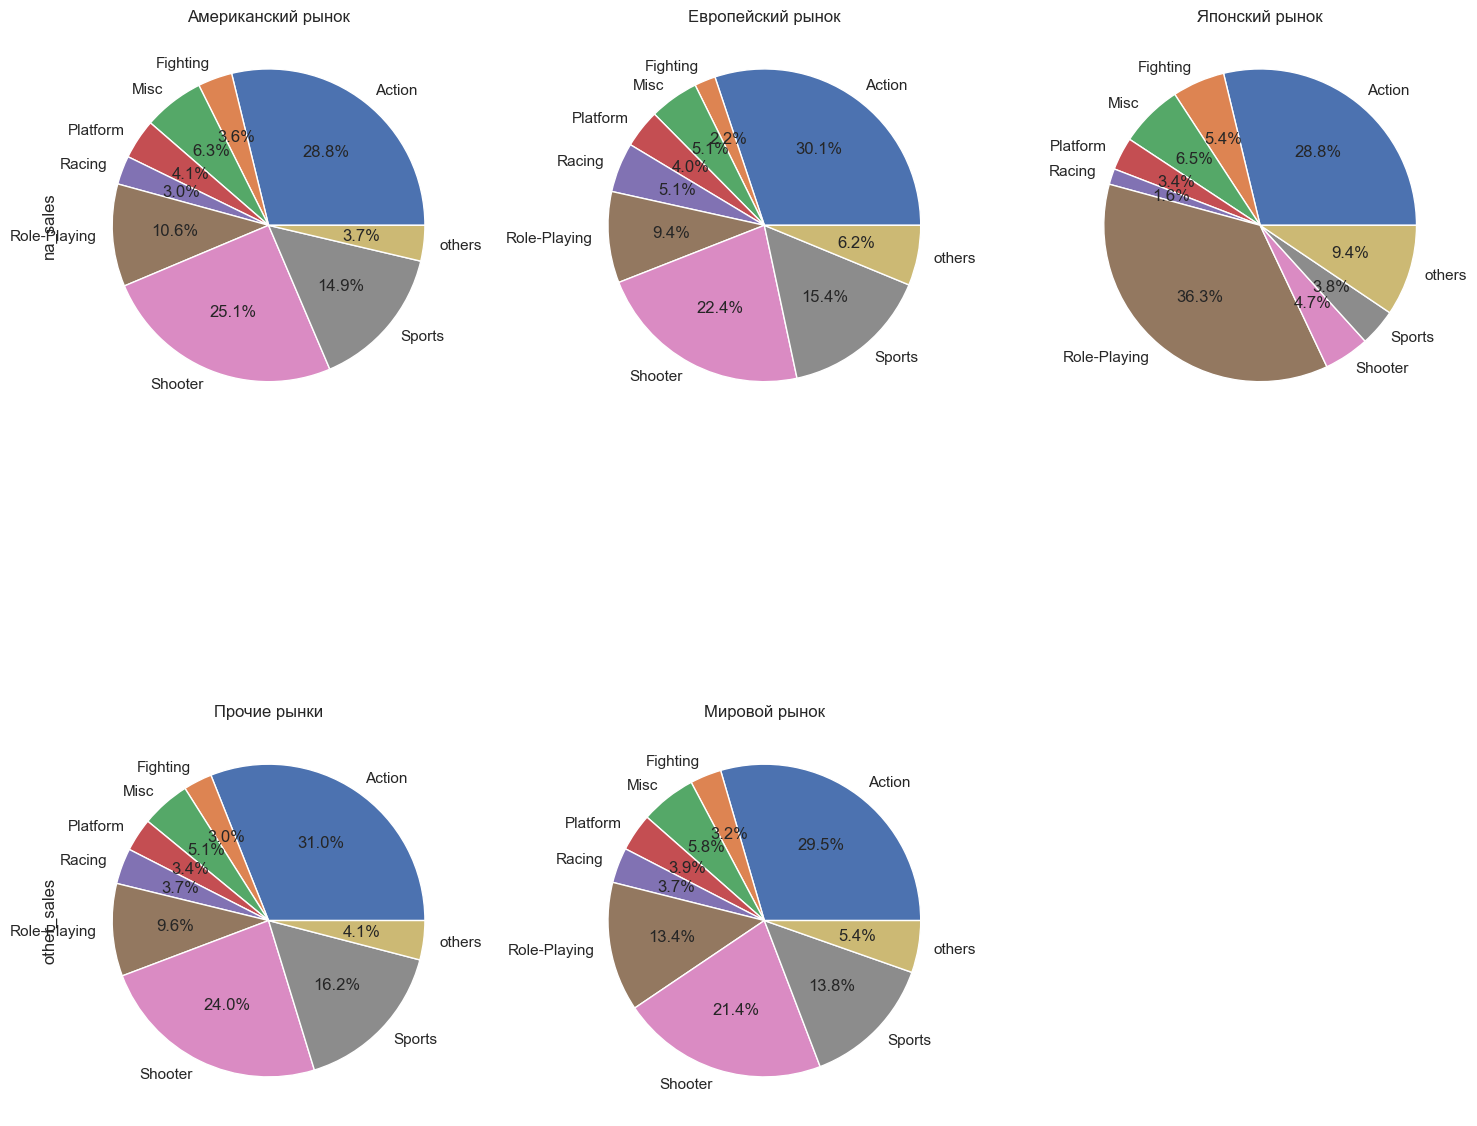

In [74]:
plt.figure(figsize=(45, 30))

ax1 = plt.subplot(2, 3, 1)
temp_df5.plot.pie(y='na_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax1)
plt.title('Американский рынок')

ax2 = plt.subplot(2, 3, 2, sharey=ax1)
temp_df5.plot.pie(y='eu_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax2)
plt.title('Европейский рынок')

ax3 = plt.subplot(2, 3, 3, sharey=ax1)
temp_df5.plot.pie(y='jp_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax3)
plt.title('Японский рынок')

ax4 = plt.subplot(2, 3, 4)
temp_df5.plot.pie(y='other_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax4)
plt.title('Прочие рынки')

ax5 = plt.subplot(2, 3, 5, sharey=ax4)
temp_df5.plot.pie(y='total_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax5)
plt.title('Мировой рынок')

plt.tight_layout()
plt.show()

Графики еще раз визуализируют вышесказанное - большинство рынков друг от друга сильно не отличаются, и только в Японии свои уникальные жанровые предпочтения.

[Вернуться к оглавлению](#title)

<a id="k-means"></a>

### Влияние оценок рейтинговых агентств на продажи

Изучим влияние возрастных рейтингов на продажи, напомни, что у ESRB есть следующая градация возрастных рейтингов:
- EC - для самых маленьких
- Е - для всех
- Е10+ - для детей старше 10 лет
- Т - подросткам
- М - для взрослых
- АО - только для взрослых (особо суровые жесткость, обнаженка и тд)
- RP - рейтинг ожидается (очевидно мы не увидим его в уже изданных продуктах)

Также мы добавили категорию "No rating" для игр, которые в ESRB не рейтинговались, что актуально для Сони и Нинтендо, как японских платформ.

In [75]:
temp_df5 = actual_games.pivot_table(index = 'rating', values = ['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum')
temp_df5 = temp_df5[temp_df5['total_sales']>0]
temp_df5['total_sales'] = temp_df5['total_sales']/temp_df5['total_sales'].sum()*100
temp_df5['na_sales'] = temp_df5['na_sales']/temp_df5['na_sales'].sum()*100
temp_df5['eu_sales'] = temp_df5['eu_sales']/temp_df5['eu_sales'].sum()*100
temp_df5['jp_sales'] = temp_df5['jp_sales']/temp_df5['jp_sales'].sum()*100
temp_df5['other_sales'] = temp_df5['other_sales']/temp_df5['other_sales'].sum()*100
temp_df5 = temp_df5.transpose()
display(temp_df5)

rating,E,E10+,M,No rating,T
eu_sales,21.253,10.884,37.050,20.118,10.695
jp_sales,10.754,4.184,10.023,60.413,14.626
na_sales,18.060,12.392,37.744,20.429,11.375
other_sales,18.846,10.478,39.210,19.555,11.911
total_sales,18.352,10.580,34.078,25.382,11.609


In [76]:
temp_df5 = temp_df5.transpose()
temp_df5

,eu_sales,jp_sales,na_sales,other_sales,total_sales
rating,,,,,
E,21.253,10.754,18.060,18.846,18.352
E10+,10.884,4.184,12.392,10.478,10.580
M,37.050,10.023,37.744,39.210,34.078
No rating,20.118,60.413,20.429,19.555,25.382
T,10.695,14.626,11.375,11.911,11.609


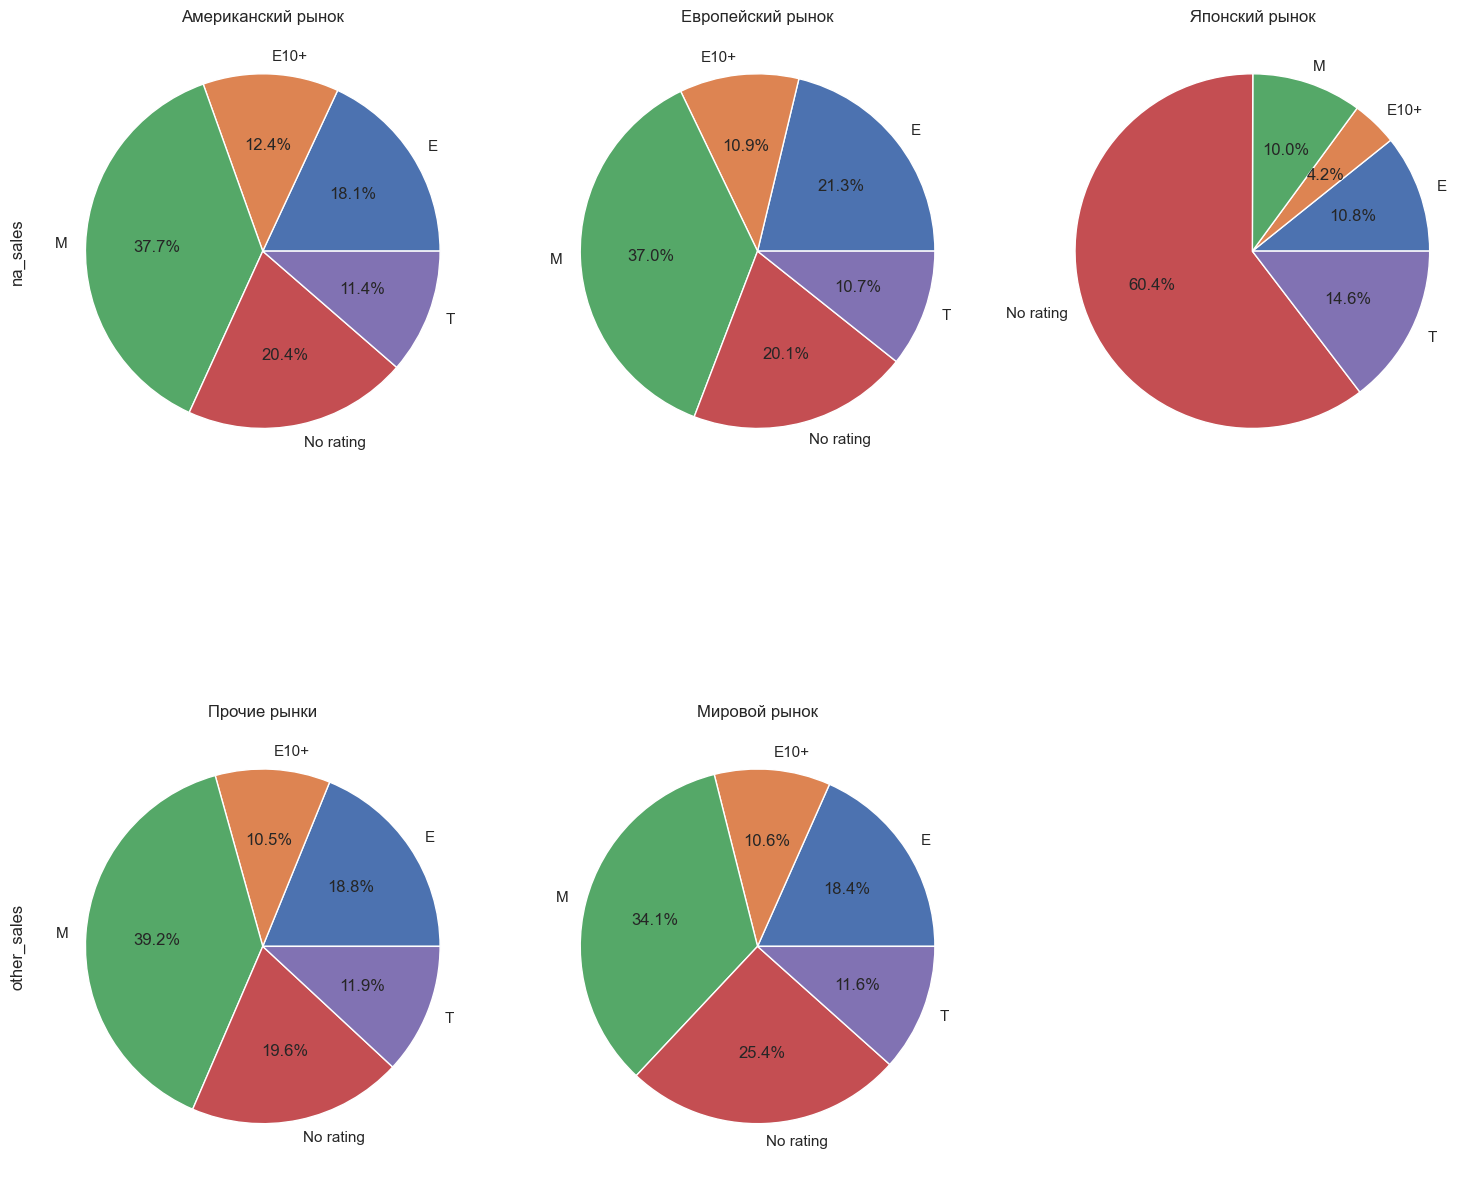

In [77]:
plt.figure(figsize=(45, 30))

ax1 = plt.subplot(2, 3, 1)
temp_df5.plot.pie(y='na_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax1)
plt.title('Американский рынок')

ax2 = plt.subplot(2, 3, 2, sharey=ax1)
temp_df5.plot.pie(y='eu_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax2)
plt.title('Европейский рынок')

ax3 = plt.subplot(2, 3, 3, sharey=ax1)
temp_df5.plot.pie(y='jp_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax3)
plt.title('Японский рынок')

ax4 = plt.subplot(2, 3, 4)
temp_df5.plot.pie(y='other_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax4)
plt.title('Прочие рынки')

ax5 = plt.subplot(2, 3, 5, sharey=ax4)
temp_df5.plot.pie(y='total_sales', figsize=(15, 15), autopct="%.1f%%", legend = False, ax=ax5)
plt.title('Мировой рынок')

plt.tight_layout()
plt.show()

Сравнительный анализ по регионам говорит нам, что на самом деле рейтинг на продажи не влияет* в силу того, что видеоигры - это достаточно взрослое развлечение. В отличии от кинематографа, например, где студии всеми силами стремятся не получить взрослыей рейтинги. 

*<i>кроме Японии, у которой особый рынок, на котором присутствует большое количество продуктов, которые не выходят за пределы родного рынка, а потому не рейтингуются у ESRB, истинное их содержание мы не знаем. Также у японцев самая высокая доля продуктов с подростковым рейтингом.</i>

[Вернуться к оглавлению](#title)

<a id="third_conclusion"></a>

### Промежуточный вывод

Строго говоря, сравнивая между собой Северную Америку, Европу, Остальной мир и Японию, следует сказать, что первые три группы стран практически не отличаются, единственное в СА относительно шире распространен иксбокс, а в Европе - ПК, в остальном жанровые предпочтения и выбор платформ, а также возрастной рейтинг самых продаваемых игр, не сильно отличаются.
А вот четвертая в списке Япония действительно является уникальным кейсом (она не зря вынесена в отдельный регион). На ее территории доминирует Нинтендо со своими портативными консолями. Также в Японии нельзя ориентироваться на американские возрастные рейтинги, так как большую часть продаж в регионе составляют продукты, у которых этого рейтинга нет вообще. 

[Вернуться к оглавлению](#title)

<a id="fourth_step"></a>

## Проверка гипотез о равенстве пользовательских оценок

Проверяем следующие гипотезы по средним пользовательским рейтингам.<br>

<b>1 задание:</b><br>
H0 - отсутствие разницы между средними пользовательскими рейтингами игр, выходивших на Xbox One и PC <br>
H1 - наличие разницы между средними пользовательскими рейтингами игр, выходивших на Xbox One и PC


<b>2 задание:</b><br>
H0 - отсутствие разницы между средними пользовательскими рейтингами игр в жанрах спорт и экшен <br>
H1 - наличие разницы между средними пользовательскими рейтингами игр в жанрах спорт и экшен


Обе гипотезу двусторонние.

Использоваться будет двусторонний t-тест Стьюдента для независимых выборок, так как пользовательские оценки заперты в пределах шкалы от 0 до 10, а потому допускают использование параметрического теста. Так как выборки разного размера, то на всякий случай предположим, что дисперсия разная. Уровень статистической значимости возьмем в 0.05, как наиболее часто используемый.

[Вернуться к оглавлению](#title)

<a id="xbox"></a>

### Xbox и PC

Удалим пропуски перед статистическим тестом, всю необходимую информацию из них мы уже получили.

In [78]:
alpha = .05 

results_platform = st.ttest_ind(
    actual_games['user_score'][(actual_games['platform'] == 'XOne') & (actual_games['user_score'] > 0)], 
    actual_games['user_score'][(actual_games['platform'] == 'PC') & (actual_games['user_score'] > 0)],
    equal_var = False)

print('p-значение:', results_platform.pvalue)

if results_platform.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


print('Относительная разница между средними пользовательскими оценками на ПК и Иксбоксе составила: ', '{0:.3f}'.format(actual_games[(actual_games['platform']=='XOne') & (actual_games['user_score'] > 0)]['user_score'].mean()/actual_games[(actual_games['platform']=='PC') & (actual_games['user_score'] > 0)]['user_score'].mean()-1)) 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу
Относительная разница между средними пользовательскими оценками на ПК и Иксбоксе составила:  0.040


Text(0.5, 1.0, 'Сравнение средних пользовательских оценок между платформами')

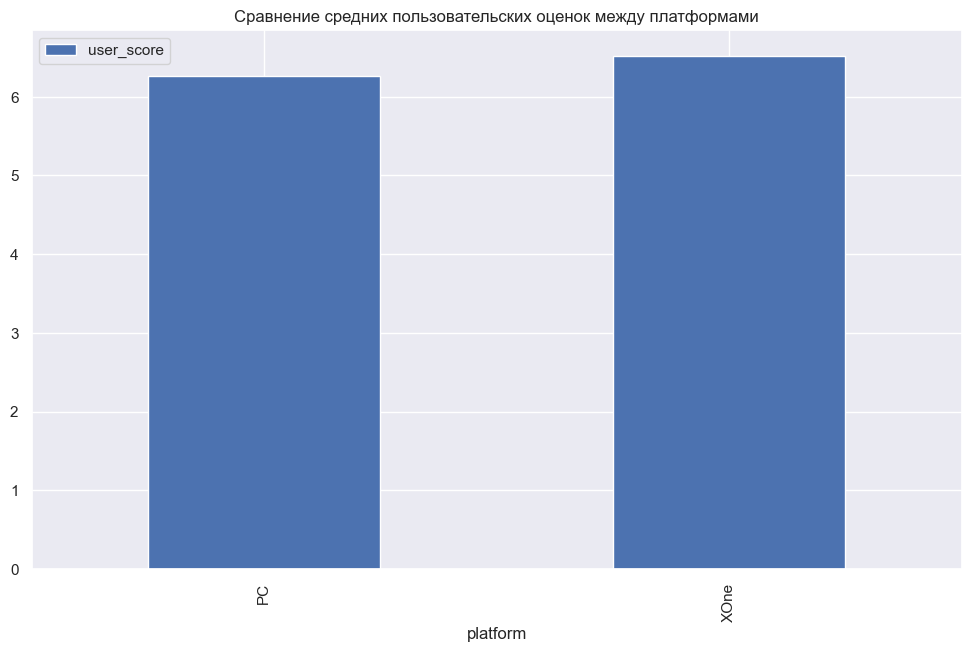

In [79]:
actual_games[actual_games['user_score'] > 0].query('platform == "XOne" | platform == "PC"').pivot_table(index = 'platform', values = 'user_score', aggfunc = 'mean').plot.bar(figsize = (12, 7)).set_title('Сравнение средних пользовательских оценок между платформами')

Text(0.5, 1.0, 'Распределение пользовательских оценок с разбивкой по платформам')

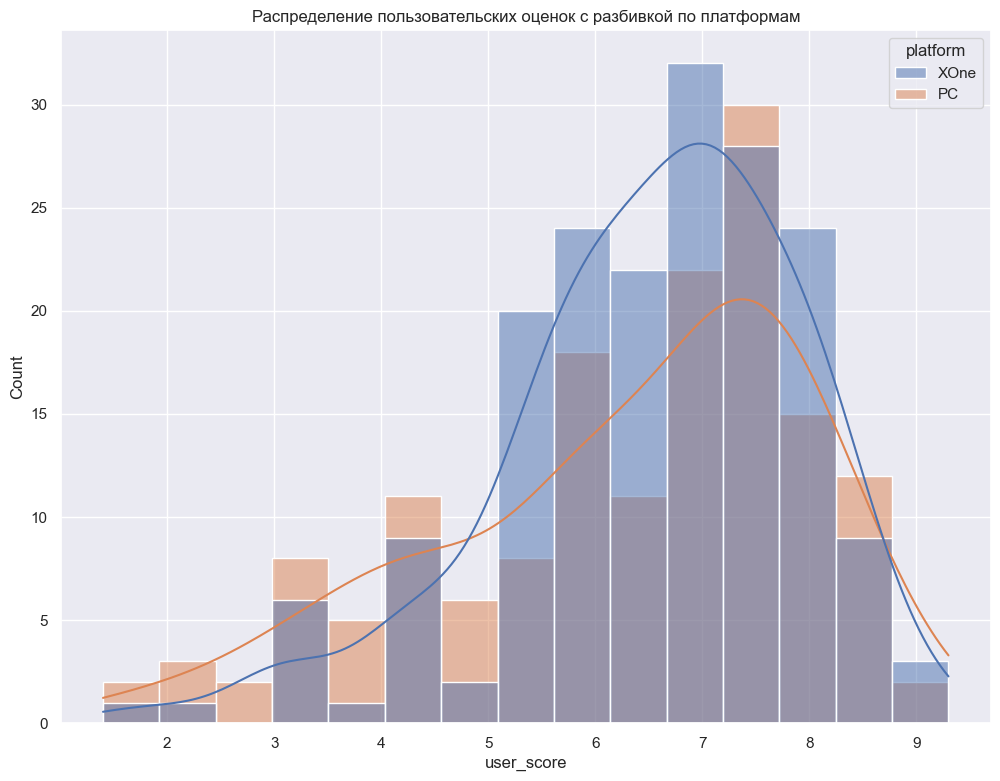

In [80]:
sns.histplot(data=actual_games[actual_games['user_score'] > 0].query('platform == "XOne" | platform == "PC"'), 
                 x="user_score", 
                 hue='platform', 
                 stat='count', 
                 bins='auto', 
                 common_bins=True, 
                 common_norm=True,
                 multiple='layer', 
                 element='bars',
                 fill=True, 
                 shrink=1, 
                 thresh=0, 
                 kde = True,
                 pthresh=None, 
                 pmax=None, 
                 cbar=True, 
                 cbar_ax=None, 
                 cbar_kws=None, 
                 palette=None, 
                 hue_order=None, 
                 hue_norm=None, 
                 color=None,
                 legend=True, 
                 ax=None).set_title('Распределение пользовательских оценок с разбивкой по платформам')

P-value по результатам теста довольно далеко от уровня статистической значимости, то есть мы вообще не можем говорить о том, что возможно некоторая разница в средних значениях все-таки имеется. Гистограмма показывает, довольно высокую схожесть распределений пользовательских оценок у обеих платформ.

[Вернуться к оглавлению](#title)

<a id="action"></a>

### Экшены и спортивные игры

In [81]:
actual_games['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', 'Fighting',
       'Racing', 'Simulation', 'Platform', 'Strategy', 'Adventure',
       'Puzzle'], dtype=object)

In [82]:
alpha = .05 

results_platform = st.ttest_ind(
    actual_games['user_score'][(actual_games['genre'] == 'Action') & (actual_games['user_score'] > 0)], 
    actual_games['user_score'][(actual_games['genre'] == 'Sports') & (actual_games['user_score'] > 0)],
    equal_var = False)

print('p-значение:', results_platform.pvalue)

if results_platform.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


print('Относительная разница между средними пользовательскими оценками на ПК и Иксбоксе составила: ', '{0:.3f}'.format(actual_games[(actual_games['genre']=='Action') & (actual_games['user_score'] > 0)]['user_score'].mean()/actual_games[(actual_games['genre']=='Sports') & (actual_games['user_score'] > 0)]['user_score'].mean()-1)) 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу
Относительная разница между средними пользовательскими оценками на ПК и Иксбоксе составила:  0.305


Text(0.5, 1.0, 'Сравнение средних пользовательских оценок между платформами')

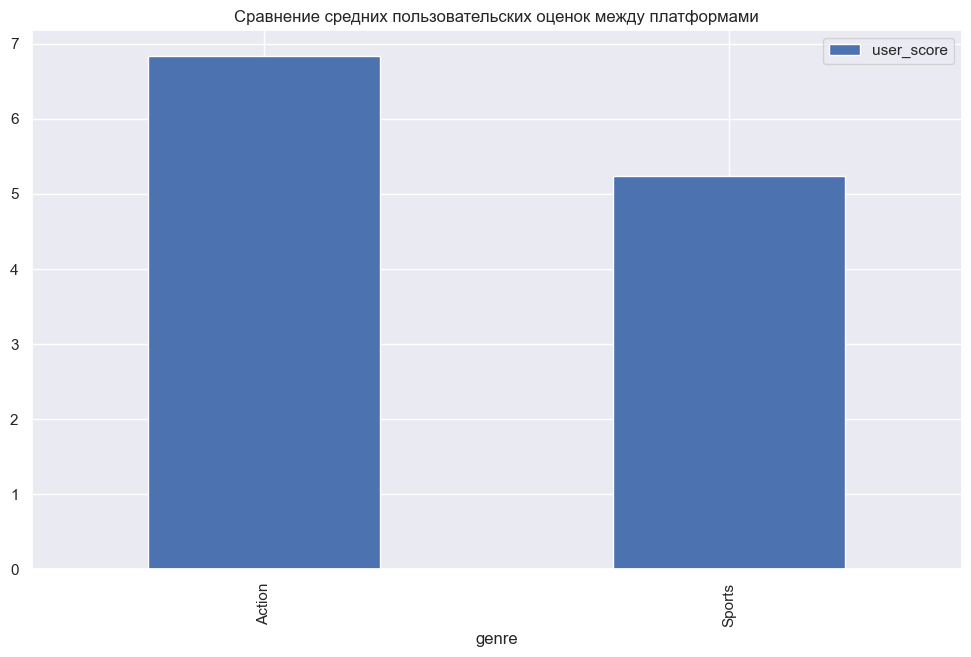

In [83]:
actual_games[actual_games['user_score'] > 0].query('genre == "Action" | genre == "Sports"').pivot_table(index = 'genre', values = 'user_score', aggfunc = 'mean').plot.bar(figsize = (12, 7)).set_title('Сравнение средних пользовательских оценок между платформами')

Text(0.5, 1.0, 'Распределение пользовательских оценок с разбивкой по платформам')

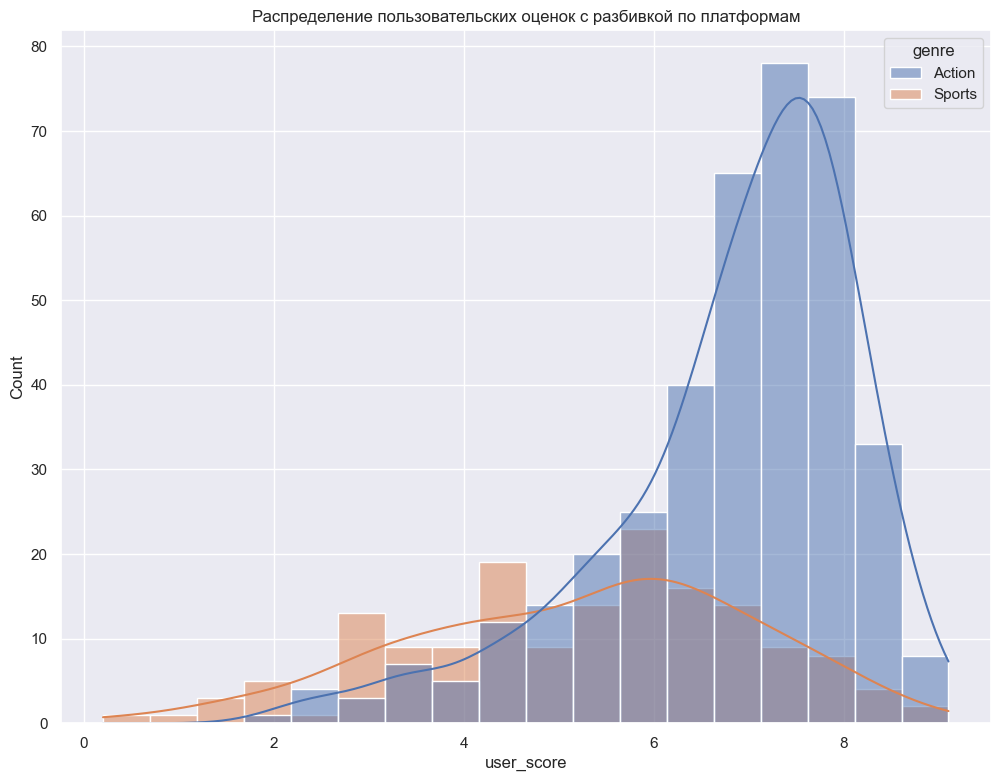

In [84]:
sns.histplot(data=actual_games[actual_games['user_score'] > 0].query('genre == "Action" | genre == "Sports"'), 
                 x="user_score", 
                 hue='genre', 
                 stat='count', 
                 bins='auto', 
                 common_bins=True, 
                 common_norm=True,
                 multiple='layer', 
                 element='bars',
                 fill=True, 
                 shrink=1, 
                 thresh=0, 
                 kde = True,
                 pthresh=None, 
                 pmax=None, 
                 cbar=True, 
                 cbar_ax=None, 
                 cbar_kws=None, 
                 palette=None, 
                 hue_order=None, 
                 hue_norm=None, 
                 color=None,
                 legend=True, 
                 ax=None).set_title('Распределение пользовательских оценок с разбивкой по платформам')

В этом сравнении спорить особо даже не о чем, разница в средних значениях очевидна, что подтверждают и статистический тест, и банальное сравнение средних значений и гистограмма.
Экшен игры гораздо качественнее спортивных, согласно оценкам пользователей. 

[Вернуться к оглавлению](#title)

<a id="fourth_conclusion"></a>

### Промежуточный вывод

По результатам статистических тестов было выявлено отсутствие статистически значимой разницы между пользовательскими оценками на Иксбокс и ПК, а также ее наличие между играми жанров Экшен и Спорт. По этой причине у нас нет оснований отвергнуть гипотезу о равенстве средних оценок игроков игр на иксбокс и пк, но при этом совершенно точно мы не можем утверждать, что они равны у двух вышеперечисленных жанров.

[Вернуться к оглавлению](#title)

<a id="final_conclusion"></a>

## Итоговый вывод

Итого в данном исследовании был проведен анализ исторических данных по продажам с особым акцентом на последние 4 года, когда на рынке начало закрепляться актуальное на момент исследования поколение консолей. Были сделаны следующие выводы:
- Японский рынок особенный, основывается больше на портативных консолях, на которых пользователи играют в японские РПГ, возрастные рейтинги у большей части продуктов просто неизвестны, это отдельный кейс, к которому не относятся все последующие выводы.
<br>
<br>
- Пользователи более прочих предпочитают игры следующих жанров: Шутер, Спорт и Платформеры - они хорошо продаются. Особенно Спорт и Шутер. 
- Адвентчуры и Стратегии наоборот особыми успехами похвастаться не могут. 
- Пользовательские рейтинги и оценки критиков не оказывают особого влияния на продажи игры, какая-то взаимосвязь обнаруживается скорее только у высококачественных игр. 
- Наиболее популярная в мире платформа - это ПС4, далее Иксбокс, который более распространен в США, в Европе некоторой относительно широкой популярностью также пользуется ПК. 
- На ПК видимо более критичная аудитория, которая выставляет более низкие оценки проектам. 
- Игры в жанре экшен отличаются более высоким качеством, чем спортимные по мнению пользователей.
- Возрастные рейтинги не имеют особого влияния на продажи, в Японии они вообще не работают. 
<br>
<br>
<b>Рекомендации:</b>
- Рекламную кампанию необходимо сосредоточить на играх выходящих на двух главных мировых платформах - ПС4 и Xbox One 
- Рекламную кампани можно не диверсифировать между регионами, за исключением Японии
- Ключевой жанр - шутеры, вторая опция - спорт
- На возрастные рейти

[Вернуться к оглавлению](#title)